# Milestone 01 fase 01

# I. Perkenalan

`Muhammad Sofyan Nurul Jamal - FTDS Batch 004`

## Dataset Description



- [DATASET](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ml_datasets&t=credit_card_default&page=table&project=seventh-acronym-285405&ws=!1m5!1m4!4m3!1sbigquery-public-data!2sml_datasets!3scredit_card_default!1m5!1m4!1m3!1sseventh-acronym-285405!2sbquxjob_6a2c643f_186d19eae29!3sUS)


- Data yang di maksud ada di Google Cloud Platform, masuk ke BigQuery mengGunakan dataset ml_datasets dari database bernama credit_card_default. Dengan ketentuan; 

Buatlah query dengan kriteria sebagai berikut:

- Pilih HANYA kolom limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month.
Pada kolom yang diambil diatas, terdapat beberapa kolom bertipe STRING. Pada saat pengambilan data dengan menggunakan perintah SELECT, lakukan konversi tipe data kolom-kolom bertipe STRING ke tipe numerik dengan panduan dibawah ini :

Kolom	Tipe Data Awal	Tipe Data Akhir
sex	STRING	INT
education_level	STRING	INT
marital_status	STRING	INT
pay_5	STRING	FLOAT
pay_6	STRING	FLOAT
default_payment_next_month	STRING	INT

- Konversi tipe data harus dilakukan dalam sintaks yang sama saat melakukan query ke Google BigQuery.

- Kolom diatas hanya digunakan sebagai dataset awal. Silakan lakukan Feature Selection di-notebook setelah dataset dibuat.

- Limit jumlah data menjadi sebanyak nomor batch dikali dengan tahun lahir kalian. ex: Batch 10 dan lahir tahun 1995, 10 x 1995 = 19950. `Disini akan menggunakan Limit 4 (batch) x 1989 (tahun lahir)= 7956`

- Simpan dataset dalam bentuk csv, dengan nama h8dsft_P1M1_<nama-students>.csv. `Disini dataset kami simpan dengan nama 'h8dsft_P1G2_Sofyan.csv'`

- Salin query yang telah dibuat di Google Cloud Platform, tulislah pada bagian atas notebook!

- Tampilkan 10 data pertama dan 10 data terakhir dari dataset pada notebook!

## Problem Statement

- Membuat model Classification untuk memprediksi default_payment_next_month menggunakan dataset yang sudah kita simpan.

## Objective 

1.  Melakukan Explorasi EDA
- Bagaimana mayoritas pelanggan pada dataset dalam membayar hutang mereka?
- Bagaimana proporsi default_payment_next_month cenderung dilihat dari umur?
- Bagaimana pendidikan seseorang kaitannya dengan pembayaran credit?
- Bagaimana kecenderungan pembayaran kredit dilihat dari status pernikahannya?

2. Membuat konsep Supervised Learning dengan ketentuan sebagi berikut:

- Mampu memperoleh data menggunakan BigQuery

- Mampu memahami konsep supervised learning

- Mampu mempersiapkan data untuk digunakan dalam model supervised learning

- Mampu mengimplementasikan supervised learning dengan data yang diberikan

- Mampu melakukan evaluasi model

- Mampu melakukan model tuning


# II. SQL

Berikut query yang telah dibuat untuk mengambil data dari Google Cloud Platform;

- SELECT limit_balance, CAST(sex AS int64) AS sex, 
CAST(education_level AS int64) AS education_level, 
CAST(marital_status AS int64) AS marital_status,age, pay_0, pay_2, pay_3, pay_4, CAST(pay_5 AS float64) AS pay_5,
CAST(pay_6 AS float64) AS pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, 
CAST(default_payment_next_month AS int64) AS default_payment_next_month 
FROM bigquery-public-data.ml_datasets.credit_card_default 
LIMIT 7956

Kemudian dataset kami simpan dengan nama 'h8dsft_P1G2_Sofyan.csv'

# III. Import Library

In [1]:
# Data Loading
import pandas as pd
from pandas.api.types import CategoricalDtype

#Importing Warning filtering
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import FunctionTransformer

# Feature Selection (manual)
import numpy as np
# Model Definition
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor


# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

# Model Inference
import joblib

# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For showing our time
import time


# IV. Data Loading

Data hasil Query kami import kedalam notebook dan memasukkannya dalam dataframe dengan nama 'df'

In [2]:
df=pd.read_csv('h8dsft_P1M1_Sofyan.csv')

Selanjutnya kita akan melihat sekilas Tampilan data.

## Overview Data

Pertama tama kita kan menampilkan 10 data pertama dan 10 data terakhir dari dataset.

In [3]:
df.head(10) # Tampilkan 10 data pertama

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000,1,6,1,54,0,0,0,0,0,...,29296,26210,17643,2545,2208,1336,2232,542,348,1
1,200000,1,4,1,49,0,0,0,0,0,...,50146,50235,48984,1689,2164,2500,3480,2500,3000,0
2,20000,2,6,2,22,0,0,0,0,0,...,1434,500,0,4641,1019,900,0,1500,0,1
3,260000,2,4,2,33,0,0,0,0,0,...,27821,30767,29890,5000,5000,1137,5000,1085,5000,0
4,150000,1,4,2,32,0,0,0,-1,0,...,150464,143375,146411,4019,146896,157436,4600,4709,5600,0
5,300000,2,4,2,32,0,0,0,0,0,...,65150,-450,700,15235,1491,1303,0,2000,1400,0
6,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
7,200000,1,1,1,58,0,0,0,0,0,...,124647,126921,129167,7822,4417,4446,4597,4677,4698,0
8,500000,1,1,1,39,0,0,0,0,0,...,174500,137406,204975,54209,4607,4603,5224,207440,7509,0
9,230000,1,1,1,48,0,0,0,0,0,...,105508,108101,110094,7000,6607,3773,4290,4164,2000,0


In [4]:
df.tail(10) # Tampilan 10 data terbawah

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,360000,2,2,2,26,-1,-1,-1,-1,-2,...,0,0,0,463,2500,0,0,0,0,0
2956,100000,1,3,1,40,0,0,-1,-1,-2,...,0,0,0,2000,2377,40000,0,0,0,0
2957,30000,2,3,1,48,1,-1,-1,-2,-2,...,0,0,0,200,0,0,0,0,0,0
2958,80000,2,3,1,39,-1,-1,-1,-1,-2,...,0,0,5000,5000,5000,0,5000,5000,470,0
2959,20000,1,3,2,26,-1,-1,-1,-2,-2,...,0,0,0,1560,0,0,0,0,0,0
2960,80000,2,3,2,28,-1,-1,-1,-2,-2,...,0,0,0,2800,0,0,0,0,0,0
2961,50000,2,3,1,51,-1,-1,-1,-1,-2,...,0,0,0,300,5880,0,0,0,0,1
2962,450000,2,2,1,38,-2,-2,-2,-2,-2,...,390,390,390,390,780,390,390,390,390,1
2963,50000,2,2,1,44,-2,-2,-2,-2,-2,...,390,390,0,390,390,390,390,0,780,0
2964,290000,2,2,1,39,1,-2,-2,-2,-2,...,3184,390,390,10000,800,3184,390,390,6617,0


Terlihat 10 data pertama dan 10 data terakhir dari dataset, disini sekilas data yang kita punya telah melalui proses encoding misalnya pada kolom sex,  education_level  marital_status. ditulis dengan angka yang sudah ditentukan.

Selanjunya kita akan melihat ada berapa baris dan kolom yang ada.

In [5]:
df.shape # melihat dimensi data

(2965, 24)

Disini terlihat dalam dataset ada 2965 baris dan 24 kolom. Selanjutnya kita akan melihat tipe data yang kita punya.

In [6]:
df.info() # Mengecheck tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

- Sekilas dari hasil info yang kita dapat data set yang semua berbentuk numerik. dan tidak mengandung missing value. namun nanti kita akan tetap melakukan pengecheckan untuk memastikannya.

In [7]:
df.isnull().sum() #  memeriksa dan menjumlahkan missing value

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

- Dengan pengececkan standar missing value kita tidak menemukan missing value. Kemudian kita akan melihat kolom yang kita punya.

In [8]:
print(df.columns.values) # melihat kolom yang kita punya

['limit_balance' 'sex' 'education_level' 'marital_status' 'age' 'pay_0'
 'pay_2' 'pay_3' 'pay_4' 'pay_5' 'pay_6' 'bill_amt_1' 'bill_amt_2'
 'bill_amt_3' 'bill_amt_4' 'bill_amt_5' 'bill_amt_6' 'pay_amt_1'
 'pay_amt_2' 'pay_amt_3' 'pay_amt_4' 'pay_amt_5' 'pay_amt_6'
 'default_payment_next_month']


Selanjutnya kita akan menyimpan data numerik dengan nama num_col.

In [9]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Fitur numerik: ", num_col)

Fitur numerik:  ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month']


Kemudian akan melihat deskriptif data dari data numerik yang kita punya.

In [10]:
# numeric overview
df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.0,163369.308600,125030.415472,10000.0,50000.0,140000.0,230000.0,800000.0
sex,2965.0,1.607757,0.488333,1.0,1.0,2.0,2.0,2.0
education_level,2965.0,1.849578,0.778184,0.0,1.0,2.0,2.0,6.0
marital_status,2965.0,1.559865,0.522317,0.0,1.0,2.0,2.0,3.0
age,2965.0,35.193255,9.109439,21.0,28.0,34.0,41.0,69.0
pay_0,2965.0,0.005059,1.114395,-2.0,-1.0,0.0,0.0,8.0
pay_2,2965.0,-0.122428,1.180784,-2.0,-1.0,0.0,0.0,7.0
pay_3,2965.0,-0.141653,1.183630,-2.0,-1.0,0.0,0.0,7.0
pay_4,2965.0,-0.185160,1.178322,-2.0,-1.0,0.0,0.0,8.0
pay_5,2965.0,-0.225295,1.159003,-2.0,-1.0,0.0,0.0,7.0


- Sekilas kita dapat melihat bahwa variabel-variabel seperti limit_balance, bill_amt_1 hingga bill_amt_6, pay_amt_1 hingga pay_amt_6 memiliki nilai maksimum yang jauh lebih besar dari nilai kuartil ke-3, yang dapat mengindikasikan kemungkinan adanya nilai ekstrem atau anomali. Namun, hal ini masih harus dikonfirmasi dengan analisis lebih lanjut seperti plot distribusi atau boxplot pada tahap selanjutnya.

In [11]:
with open('unique_values.txt', 'w') as f:
    for col in num_col:
        unique_values = df[col].unique()
        f.write('Unique values in ' + col + ':\n')
        f.write(str(unique_values) + '\n')
        f.write('-' * 30 + '\n')

In [12]:
for col in num_col:                         # overview Numerical
    unique_values = df[col].unique()
    print('Unique values in', col, ':')
    print(unique_values)
    print('-' * 30)

Unique values in limit_balance :
[ 80000 200000  20000 260000 150000 300000 130000 500000 230000 460000
 780000 170000 320000 290000 240000 340000 360000 380000 180000 100000
  90000  50000 160000  70000 280000 220000  30000 120000  10000 470000
 310000 140000  60000 110000 430000 210000 490000 330000 250000 400000
 370000 440000 700000 530000 390000 410000 270000 560000  40000 680000
 480000 190000 350000 420000 510000 800000 450000 750000 620000]
------------------------------
Unique values in sex :
[1 2]
------------------------------
Unique values in education_level :
[6 4 1 2 3 5 0]
------------------------------
Unique values in marital_status :
[1 2 3 0]
------------------------------
Unique values in age :
[54 49 22 33 32 45 58 39 48 34 47 46 30 35 55 42 56 31 53 40 36 51 37 44
 24 38 26 25 23 27 28 29 41 63 50 43 66 61 52 62 69 21 65 57 64 67 60 59
 68]
------------------------------
Unique values in pay_0 :
[ 0  2  1 -1 -2  3  4  5  6  7  8]
------------------------------
Uni

Kemudian kita akan memeriksa apakah ada data yang terduplikasi 

In [13]:
df[df.duplicated()].shape # melihat ada tidaknya data yang terduplikat

(1, 24)

Terlihat ada 1 baris data yang terduplikasi.

Berikut ikhtisar dari beberapa overview yang telah kita lakukan;

1. Dalam dataset terdapat 2965 baris dan 24 kolom.

2. Data set yang kita punya semua berbentuk numerik.

3. Dengan pengececkan standar missing value kita tidak menemukan missing value. Di tahap selanjutnya kita akan melakukan non standar missing value untuk memastikannya.

4. Dari sekilas hasil dari deskripsi data, kita dapat melihat bahwa variabel-variabel seperti limit_balance, bill_amt_1 hingga bill_amt_6, pay_amt_1 hingga pay_amt_6 memiliki nilai maksimum yang jauh lebih besar dari nilai kuartil ke-3, yang dapat mengindikasikan kemungkinan adanya nilai ekstrem atau anomali. Namun, hal ini masih harus dikonfirmasi dengan analisis lebih lanjut seperti plot distribusi atau boxplot pada tahap selanjutnya.

5. Terlihat ada 1 baris data yang terduplikasi, yang akan kita hapus pada tahap selanjutnya.

## Data Cleaning

Disini kita akan mengcleaning data dengan menghandle data yang mengandung missing value atau yang terduplikasi dll. Pertama tama dataframe yang digunakan  akan disimpan dengan nama df_clean.

In [14]:
df_clean = df.copy()      # dataframe yang digunakan pada sesi ini akan disimpan dengan nama df_clean 
df_clean.head(3)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000,1,6,1,54,0,0,0,0,0,...,29296,26210,17643,2545,2208,1336,2232,542,348,1
1,200000,1,4,1,49,0,0,0,0,0,...,50146,50235,48984,1689,2164,2500,3480,2500,3000,0
2,20000,2,6,2,22,0,0,0,0,0,...,1434,500,0,4641,1019,900,0,1500,0,1


Sebelumnya kita telah memeriksa missing value dengan standar missing value dimana kita tidak menemukan missing, sekarang kita akan melakukan pengecheckan non standar untuk memastikan.

In [15]:
# memeriksa apakah ada missing value yang tidak biasa atau non standar
miss = {}

for i in list(df_clean.columns):
    miss[i] = 0
    for a in df_clean[i]:
        if a in ['N/A', '--', '-', 'Null', '?', ' ?', 'NaN', ' NaN']:
            miss[i] = miss[i] + 1
miss

{'limit_balance': 0,
 'sex': 0,
 'education_level': 0,
 'marital_status': 0,
 'age': 0,
 'pay_0': 0,
 'pay_2': 0,
 'pay_3': 0,
 'pay_4': 0,
 'pay_5': 0,
 'pay_6': 0,
 'bill_amt_1': 0,
 'bill_amt_2': 0,
 'bill_amt_3': 0,
 'bill_amt_4': 0,
 'bill_amt_5': 0,
 'bill_amt_6': 0,
 'pay_amt_1': 0,
 'pay_amt_2': 0,
 'pay_amt_3': 0,
 'pay_amt_4': 0,
 'pay_amt_5': 0,
 'pay_amt_6': 0,
 'default_payment_next_month': 0}

- Hasilnya dengan metode non standar value kami juga tidak missing value. Oleh karena itu, kita tidak perlu melakukan imputasi data atau melakukan analisis lebih lanjut untuk menentukan kategori kehilangan data (MCAR, MAR, atau MNAR) pada dataset ini. Selanjutnya kita akan menghendle data yang terduplikasi.

In [16]:
df_clean[df_clean.duplicated()].shape  # shape dari dataframe sebelum kita hapus data yang terduplikasi

(1, 24)

In [17]:
df_clean.drop_duplicates(inplace=True) # menghapus data yang terduplikasi 

df_clean[df_clean.duplicated()].shape # shape dari dataframe setelah kita hapus data yang terduplikasi

(0, 24)

Terlihat data yang terduplikasi sudah hilang, Selanjutnya kita akan masuk pada tahap analisa data

# V. Exploratory Data Analysis (EDA)

Dalam tahap ini, kami akan melakukan beberapa eksplorasi data untuk menambah wawasan.

## EDA for Analysis Purpose

Dalam tahap ini, kami akan melakukan beberapa eksplorasi data untuk menambah wawasan.

In [18]:
df_clean.describe().T # melihat deskripsi data

,count,mean,std,min,25%,50%,75%,max
limit_balance,2964.0,163356.950067,125049.701016,10000.0,50000.00,140000.0,230000.00,800000.0
sex,2964.0,1.607625,0.488362,1.0,1.00,2.0,2.00,2.0
education_level,2964.0,1.849865,0.778159,0.0,1.00,2.0,2.00,6.0
marital_status,2964.0,1.560054,0.522304,0.0,1.00,2.0,2.00,3.0
age,2964.0,35.193657,9.110949,21.0,28.00,34.0,41.00,69.0
pay_0,2964.0,0.004723,1.114434,-2.0,-1.00,0.0,0.00,8.0
pay_2,2964.0,-0.121795,1.180479,-2.0,-1.00,0.0,0.00,7.0
pay_3,2964.0,-0.141026,1.183337,-2.0,-1.00,0.0,0.00,7.0
pay_4,2964.0,-0.184548,1.178049,-2.0,-1.00,0.0,0.00,8.0
pay_5,2964.0,-0.224696,1.158739,-2.0,-1.00,0.0,0.00,7.0


Dari deskripsi statistik pada tabel di atas, 

- Nilai 1 pada kolom 'default_payment_next_month' menunjukkan bahwa klien tersebut mengalami pembayaran tunggakan pada bulan berikutnya, sedangkan nilai 0 menunjukkan bahwa klien tersebut tidak mengalami pembayaran tunggakan pada bulan berikutnya.

- rata-rata (mean) dari kolom 'default_payment_next_month' adalah 0.214, yang menunjukkan bahwa sekitar 21.4% dari total 2964 klien dalam dataset mengalami pembayaran tunggakan pada bulan berikutnya. Hal ini menunjukkan bahwa terdapat sebagian klien yang memiliki resiko tinggi mengalami pembayaran tunggakan dan perlu mendapatkan perhatian lebih dari pihak bank untuk mencegah terjadinya pembayaran tunggakan tersebut.

In [19]:
df_clean.default_payment_next_month.unique() # check variable unik

array([1, 0], dtype=int64)

Selanjutnya kita akan melakukan beberapa visualisasi yang dilakukan untuk memudahkan tugas kita.

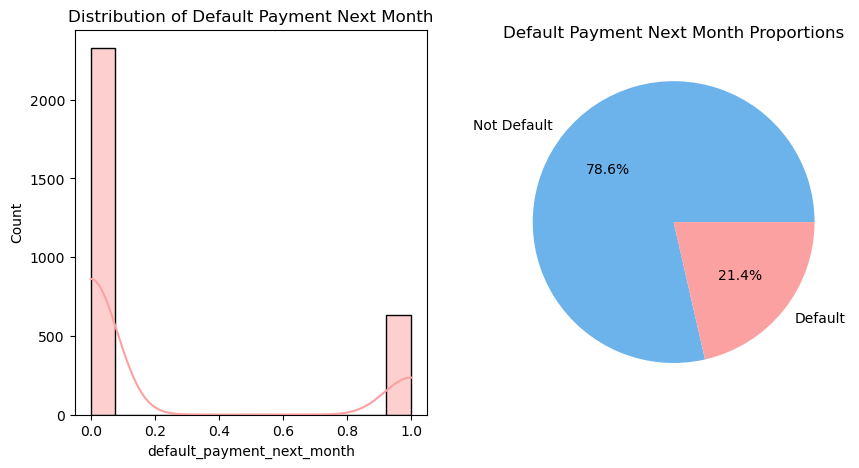

In [20]:
# Buat subplot dengan ukuran 10x5
fig, ax = plt.subplots(figsize=(10, 5), ncols=2)

# Plot histogram untuk kolom 'default_payment_next_month' pada subplot pertama
sns.histplot(ax=ax[0], data=df_clean, x='default_payment_next_month', color='#FCA1A1', kde=True)
ax[0].set_title('Distribution of Default Payment Next Month')

# Plot pie chart untuk proporsi kolom 'default_payment_next_month' pada subplot kedua
ax[1].pie(df_clean['default_payment_next_month'].value_counts(), labels=['Not Default', 'Default'], autopct='%1.1f%%', colors=['#6CB2EB', '#FCA1A1'])
ax[1].set_title('Default Payment Next Month Proportions')

# Tampilkan plot
plt.show()



- Berdasarkan plot yang menunjukkan grafik perbandingan antara total data dari kedua kelas, kita dapat mengetahui bahwa kita memiliki dataset yang tidak seimbang.

- Nilai 1 pada kolom 'default_payment_next_month' menunjukkan bahwa klien tersebut mengalami pembayaran tunggakan pada bulan berikutnya, sedangkan nilai 0 menunjukkan bahwa klien tersebut tidak mengalami pembayaran tunggakan pada bulan berikutnya.

- Terlihat bahwa proporsi pelanggan yang membayar kembali hutang mereka pada bulan berikutnya (kategori "Not Default") lebih tinggi dibandingkan dengan pelanggan yang gagal membayar hutang mereka pada bulan berikutnya (kategori "Default"). Hal ini menunjukkan bahwa mayoritas pelanggan pada dataset ini dapat diandalkan dalam membayar hutang mereka, yang dapat dianggap sebagai sinyal positif bagi bisnis.

- Namun, terlihat juga bahwa proporsi pelanggan yang gagal membayar hutang mereka pada bulan berikutnya tidak dapat diabaikan. Oleh karena itu, perlu dilakukan analisis lebih lanjut untuk memahami faktor-faktor yang mempengaruhi kategori "Default" dan mencari solusi untuk mengurangi risiko ini.

Selanjutnya kita akan melihat hubungan antara variabel age dan default_payment_next_month.

In [21]:
# Change some data labels, and assgin to new dataframe
df_nom = df.copy()
df_nom.replace({'sex': {1 : 'male', 2 : 'female'}, 'education_level' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'marital_status' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)


<Figure size 1000x600 with 0 Axes>

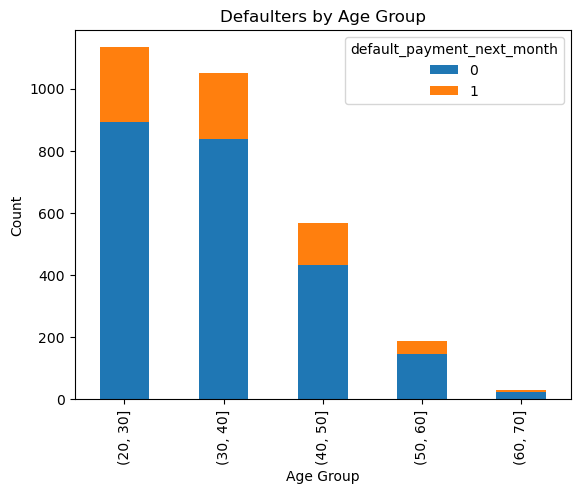

In [22]:
plt.figure(figsize=(10,6))
age_groups = pd.cut(df_nom.age, bins=[20,30,40,50,60,70,80])
age_default = pd.crosstab(age_groups, df_nom['default_payment_next_month'])
age_default.plot(kind='bar', stacked=True)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Defaulters by Age Group')
plt.show()


- Dari hasil visualisasi, kita bisa melihat bahwa proporsi default_payment_next_month cenderung lebih tinggi pada kelompok umur yang lebih muda (20-30 tahun) dan juga pada kelompok umur yang lebih tua (60-70 tahun).

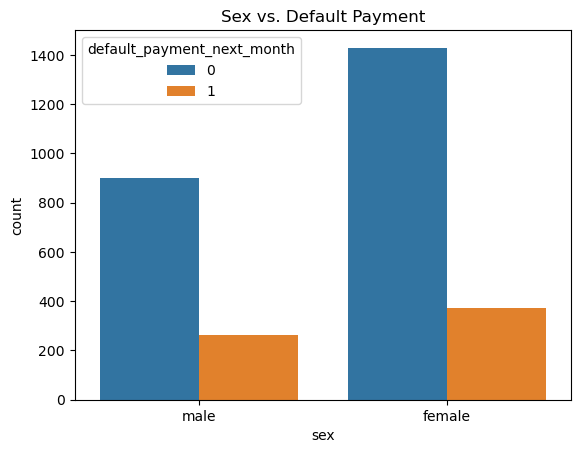

In [23]:
# Sex vs. Default Payment
sns.countplot(data=df_nom, x='sex', hue='default_payment_next_month')
plt.title('Sex vs. Default Payment')
plt.show()


- Dapat dilihat bahwa jumlah wanita yang mengalami keterlambatan pembayaran lebih besar dibandingkan pria. Namun, secara keseluruhan, proporsi keterlambatan pembayaran pada kedua jenis kelamin relatif sama.

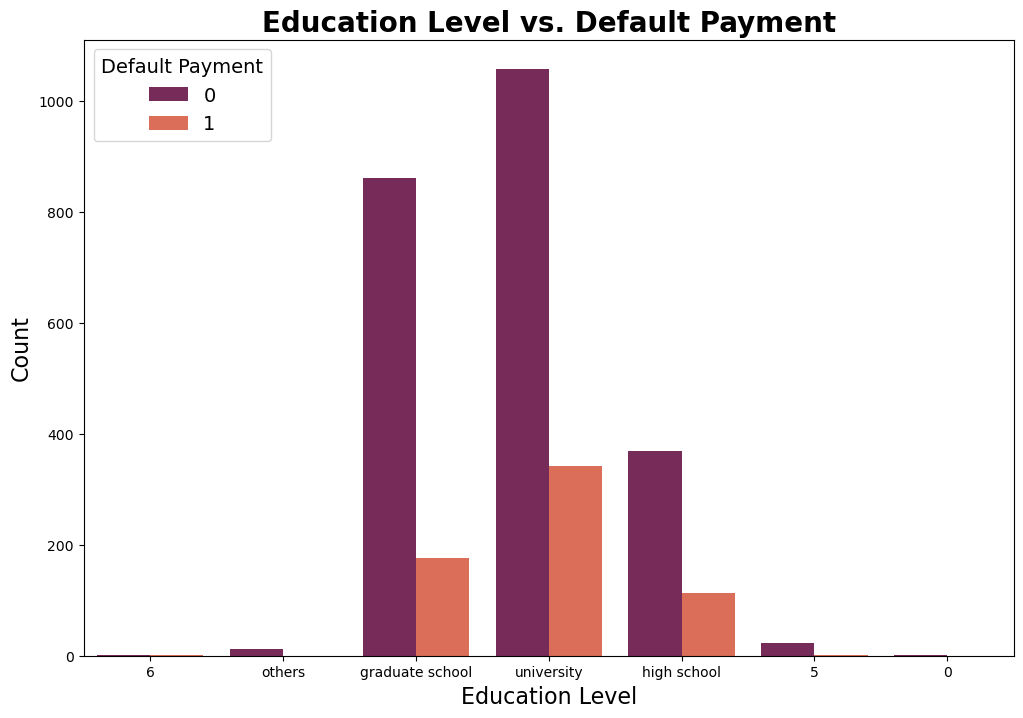

In [24]:
# Education Level vs. Default Payment
plt.figure(figsize=(12,8))
sns.countplot(data=df_nom, x='education_level', hue='default_payment_next_month', palette='rocket')
plt.title('Education Level vs. Default Payment', fontsize=20, fontweight='bold')
plt.xlabel('Education Level', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(title='Default Payment', fontsize=14, title_fontsize=14)
plt.show()

- Dapat dilihat bahwa semakin tinggi tingkat pendidikan seseorang, semakin kecil proporsi orang yang mengalami keterlambatan pembayaran.

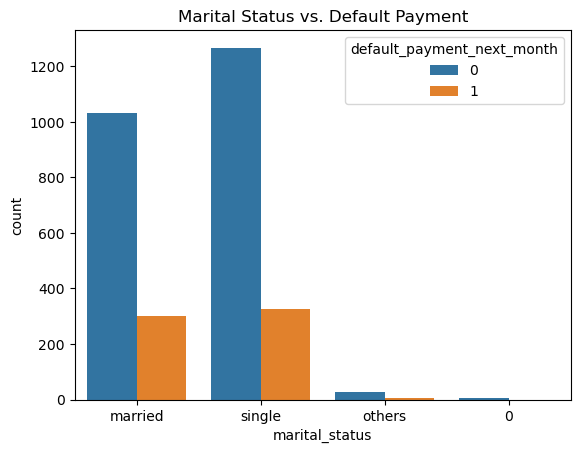

In [25]:
# Marital Status vs. Default Payment
sns.countplot(data=df_nom, x='marital_status', hue='default_payment_next_month')
plt.title('Marital Status vs. Default Payment')
plt.show()

- Dapat dilihat bahwa individu yang belum menikah lebih cenderung mengalami keterlambatan pembayaran daripada yang sudah menikah atau yang bercerai.

Berikut ikhtisar EDA for analisis ;

1. Dari deskripsi statistik pada tabel di atas, 

- Nilai 1 pada kolom 'default_payment_next_month' menunjukkan bahwa klien tersebut mengalami pembayaran tunggakan pada bulan berikutnya, sedangkan nilai 0 menunjukkan bahwa klien tersebut tidak mengalami pembayaran tunggakan pada bulan berikutnya.

- rata-rata (mean) dari kolom 'default_payment_next_month' adalah 0.214, yang menunjukkan bahwa sekitar 21.4% dari total 2964 klien dalam dataset mengalami pembayaran tunggakan pada bulan berikutnya. Hal ini menunjukkan bahwa terdapat sebagian klien yang memiliki resiko tinggi mengalami pembayaran tunggakan dan perlu mendapatkan perhatian lebih dari pihak bank untuk mencegah terjadinya pembayaran tunggakan tersebut.

2. Dari Hasil kolom Explorasi 'default_payment_next_month'

- Nilai 1 pada kolom 'default_payment_next_month' menunjukkan bahwa klien tersebut mengalami pembayaran tunggakan pada bulan berikutnya, sedangkan nilai 0 menunjukkan bahwa klien tersebut tidak mengalami pembayaran tunggakan pada bulan berikutnya.

- Terlihat bahwa proporsi pelanggan yang membayar kembali hutang mereka pada bulan berikutnya (kategori "Not Default") lebih tinggi dibandingkan dengan pelanggan yang gagal membayar hutang mereka pada bulan berikutnya (kategori "Default"). Hal ini menunjukkan bahwa mayoritas pelanggan pada dataset ini dapat diandalkan dalam membayar hutang mereka, yang dapat dianggap sebagai sinyal positif bagi bisnis.

- Namun, terlihat juga bahwa proporsi pelanggan yang gagal membayar hutang mereka pada bulan berikutnya tidak dapat diabaikan. Oleh karena itu, perlu dilakukan analisis lebih lanjut untuk memahami faktor-faktor yang mempengaruhi kategori "Default" dan mencari solusi untuk mengurangi risiko ini.

3. Dari hasil visualisasi default_payment_next_month vs Age, kita bisa melihat bahwa proporsi default_payment_next_month cenderung lebih tinggi pada kelompok umur yang lebih muda (20-30 tahun) dan juga pada kelompok umur yang lebih tua (60-70 tahun).

4. Dari hasil visualisasi default_payment_next_month vs Sex , dapat dilihat bahwa jumlah wanita yang mengalami keterlambatan pembayaran lebih besar dibandingkan pria. Namun, secara keseluruhan, proporsi keterlambatan pembayaran pada kedua jenis kelamin relatif sama.

5. Dari hasil visualisasi default_payment_next_month vs education_level, Dapat dilihat bahwa semakin tinggi tingkat pendidikan seseorang, semakin kecil proporsi orang yang mengalami keterlambatan pembayaran.

6. Dari hasil visualisasi default_payment_next_month vs marital_status, Dapat dilihat bahwa individu yang belum menikah lebih cenderung mengalami keterlambatan pembayaran daripada yang sudah menikah atau yang bercerai.

## EDA for Modeling

Distribusi data pada kolom numerik.

In [26]:
# fungsi untuk membuat histogram dan boxplot dari sebuah fitur
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=10)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable],whis=3)
    plt.title('Boxplot')

    plt.show()

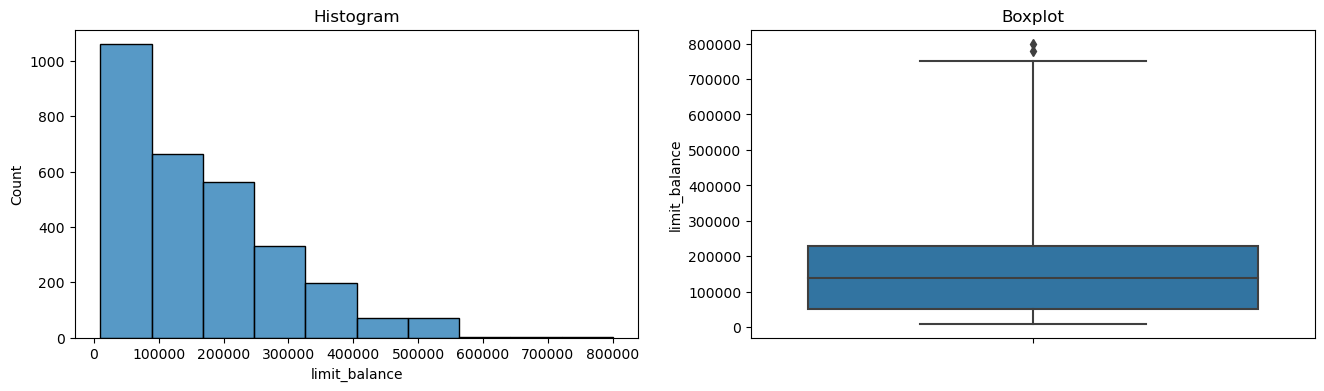


Skewness Value :  1.0006047564306488


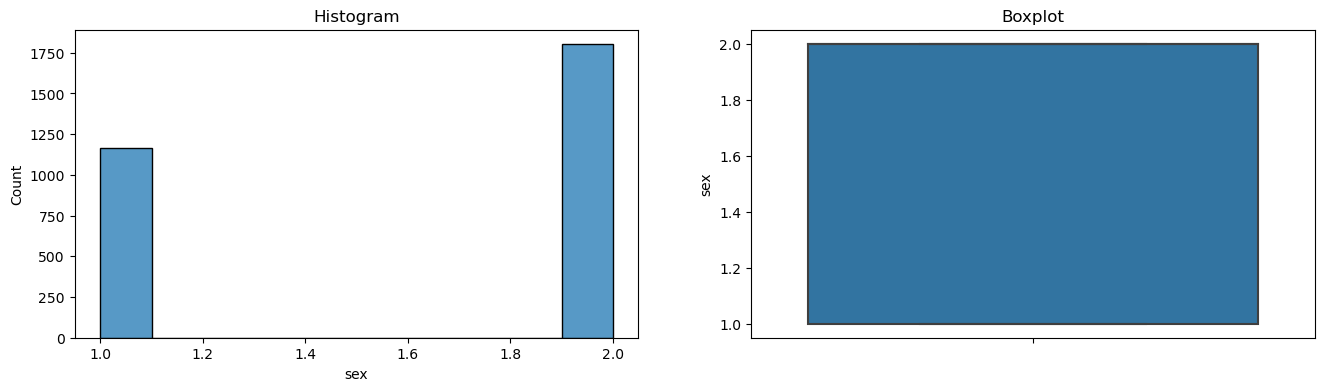


Skewness Value :  -0.44105610326648875


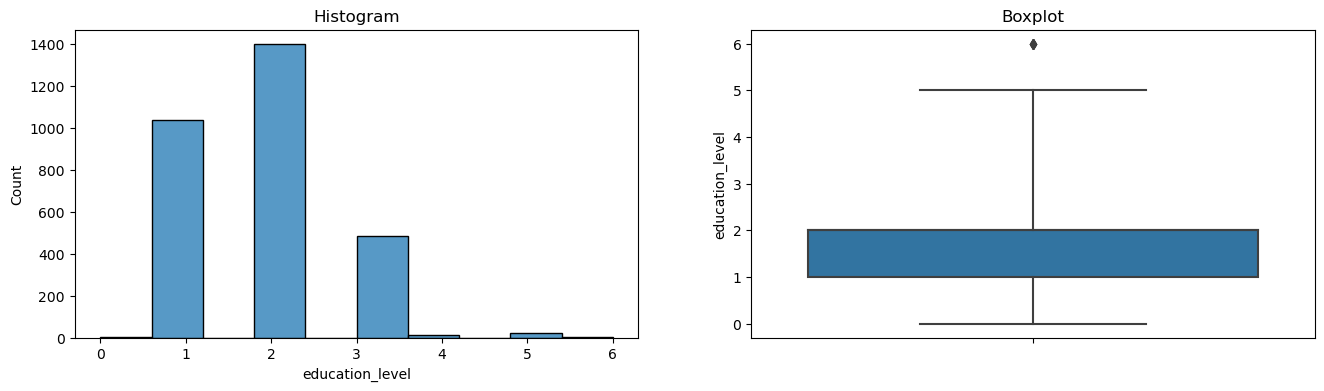


Skewness Value :  0.8995997809081094


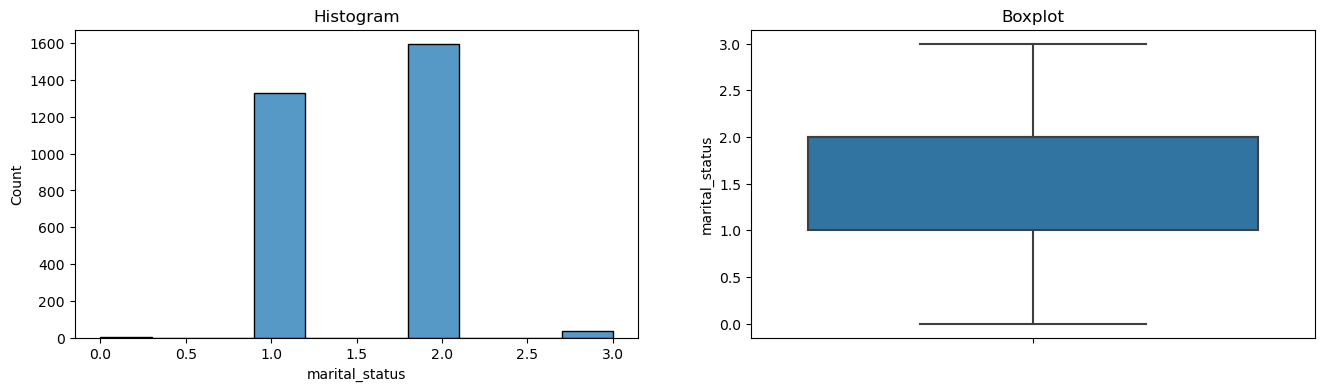


Skewness Value :  -0.020783953006335464


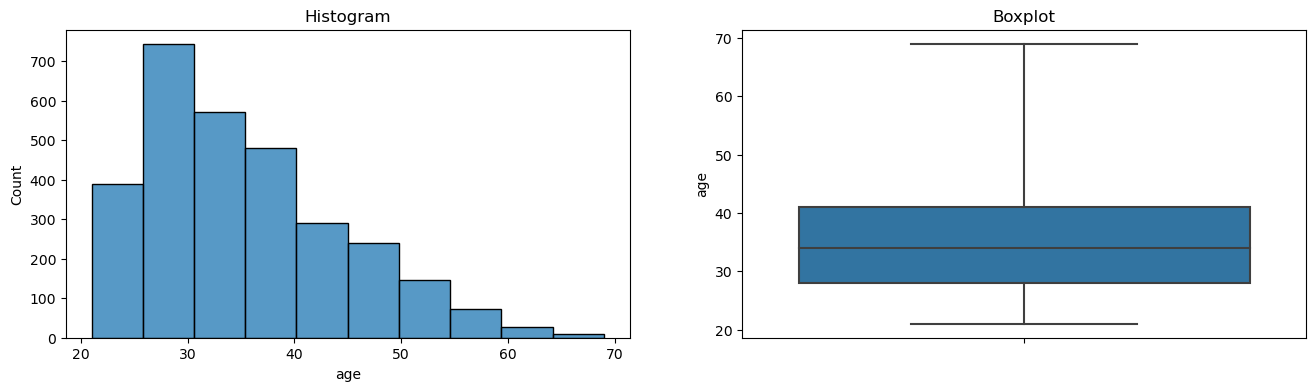


Skewness Value :  0.7726317877077615


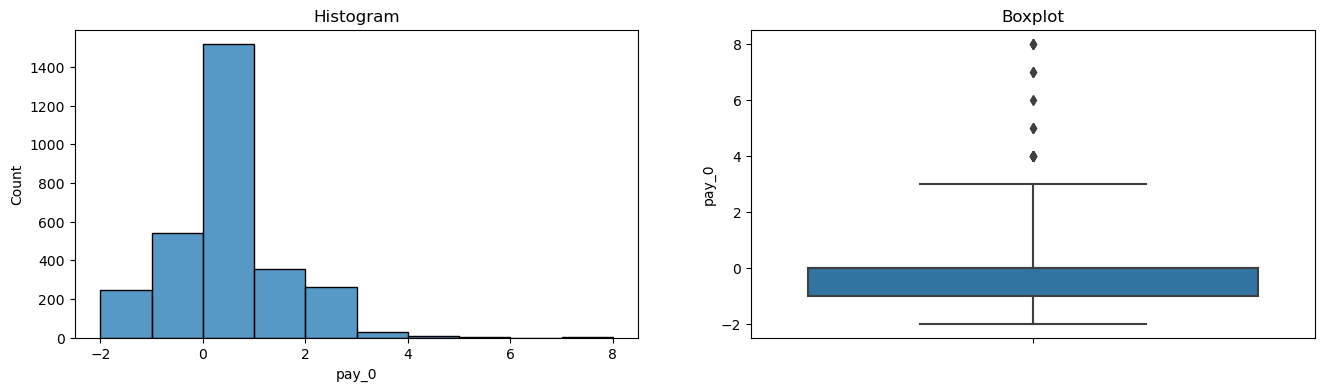


Skewness Value :  0.9276720756106166


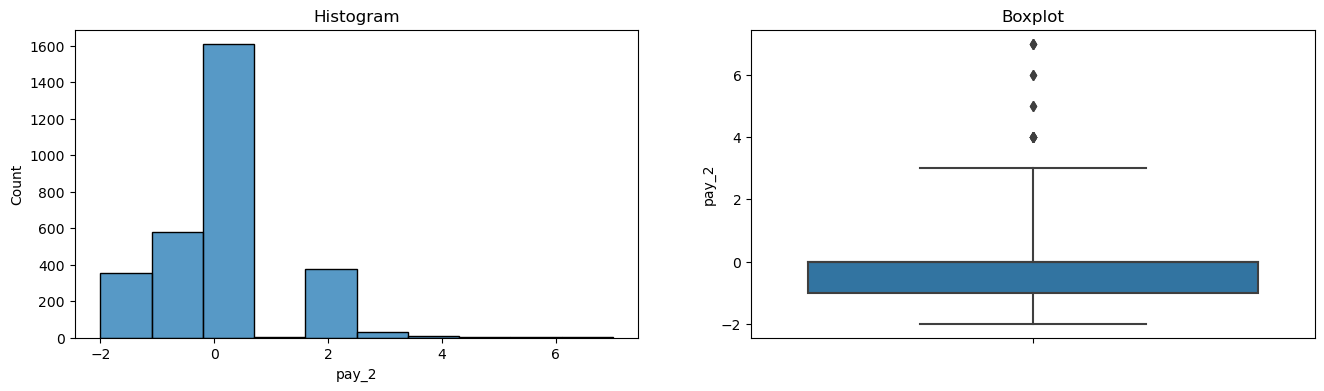


Skewness Value :  0.8624687970101019


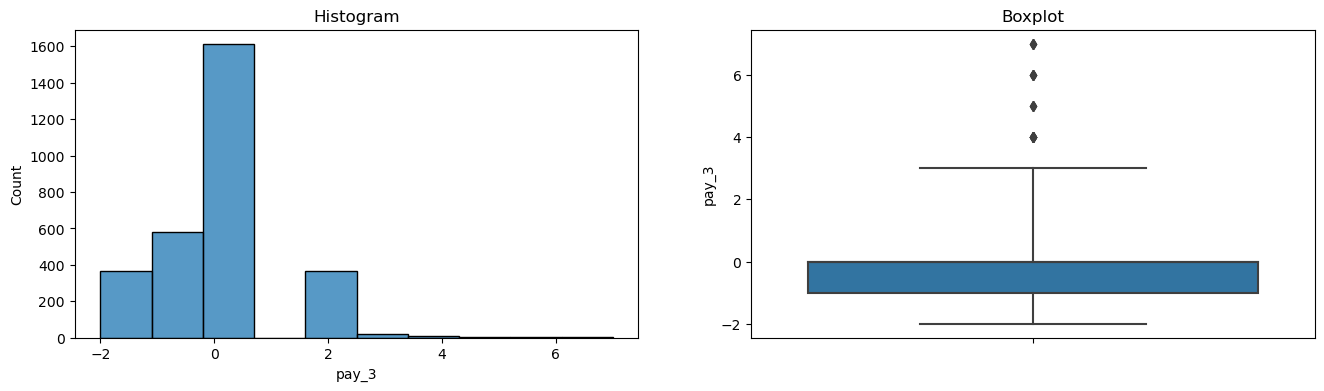


Skewness Value :  0.9321840116222396


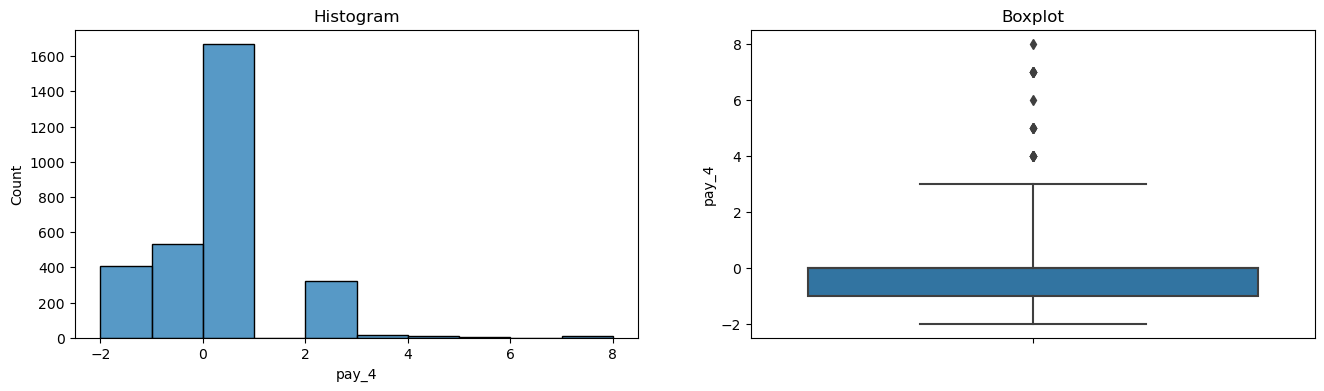


Skewness Value :  1.102317023326789


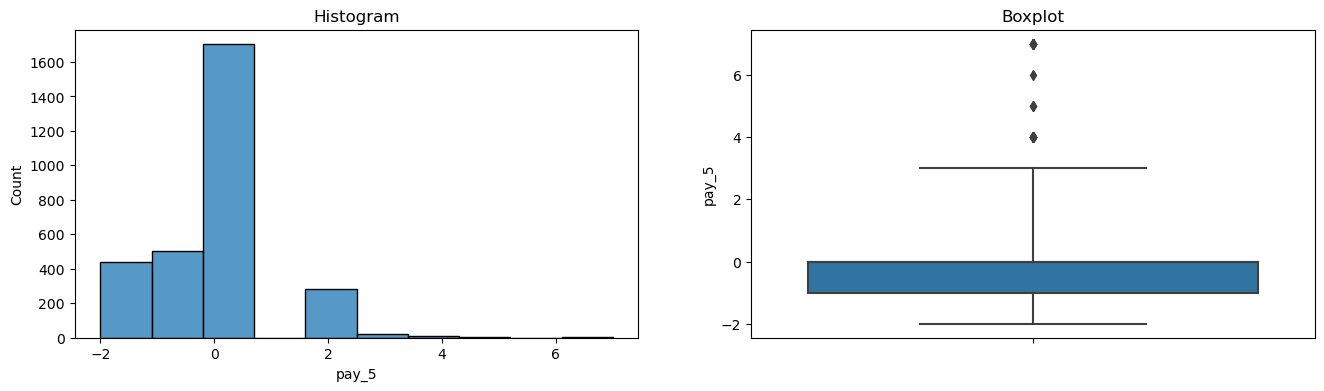


Skewness Value :  1.060916090705517


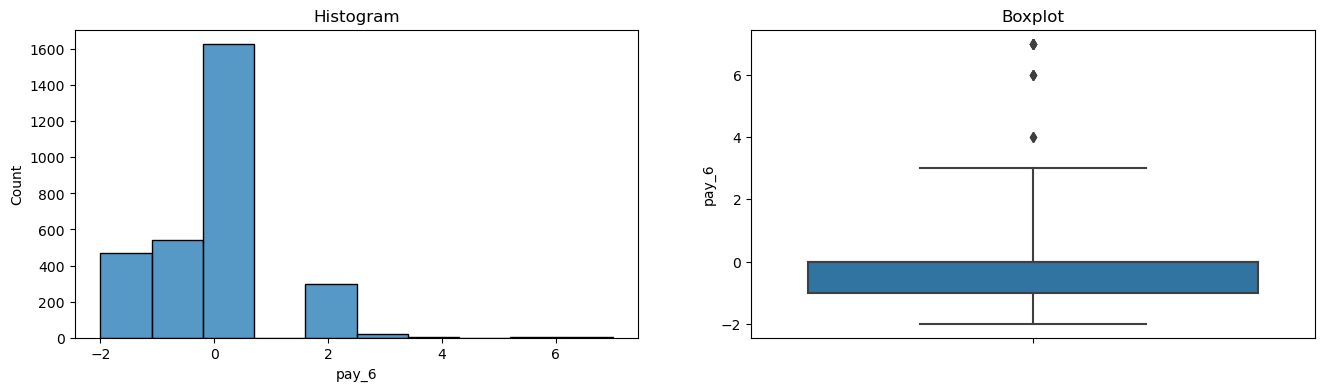


Skewness Value :  0.9793187194607118


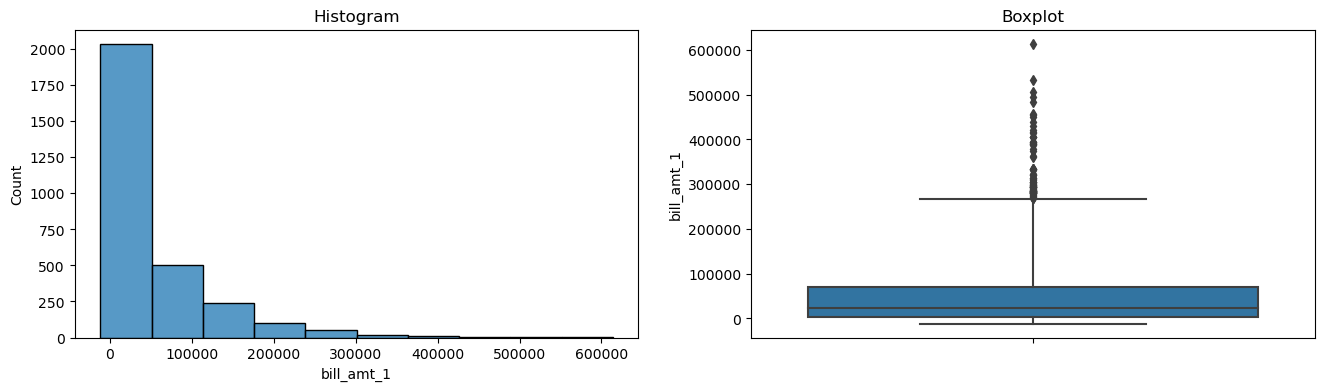


Skewness Value :  2.4842290445797968


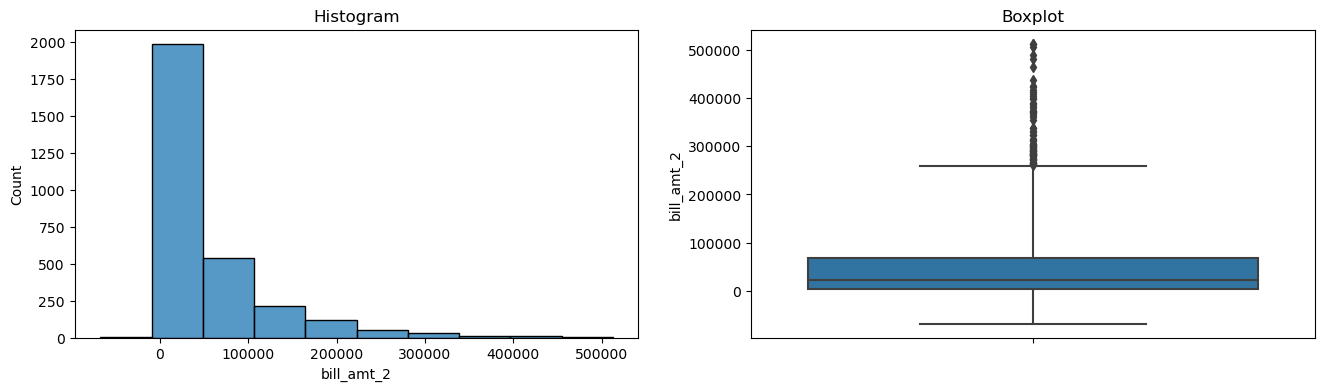


Skewness Value :  2.4579711014121437


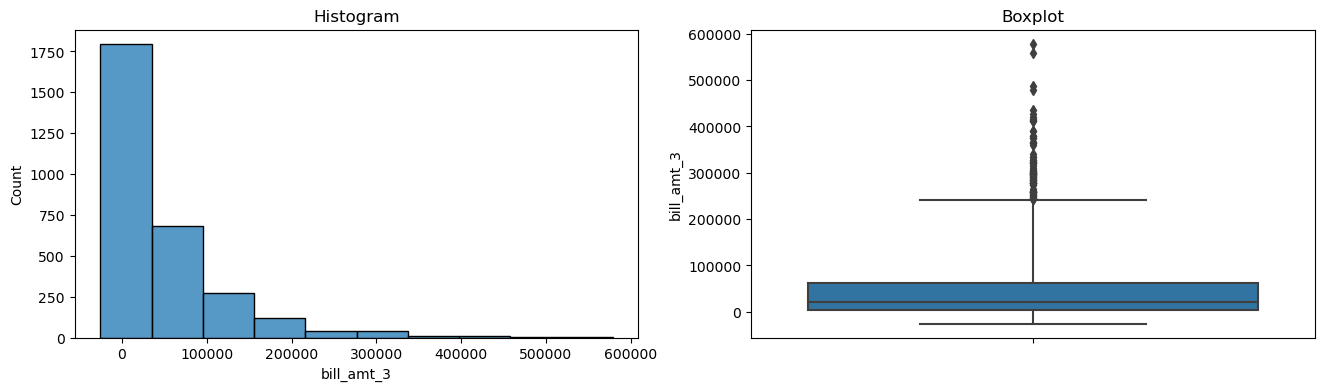


Skewness Value :  2.569558864308388


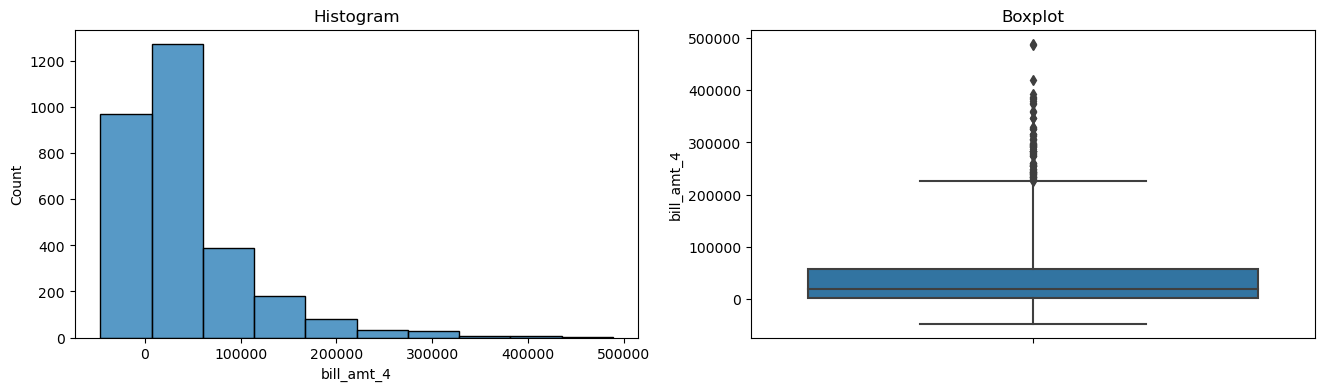


Skewness Value :  2.447791627637353


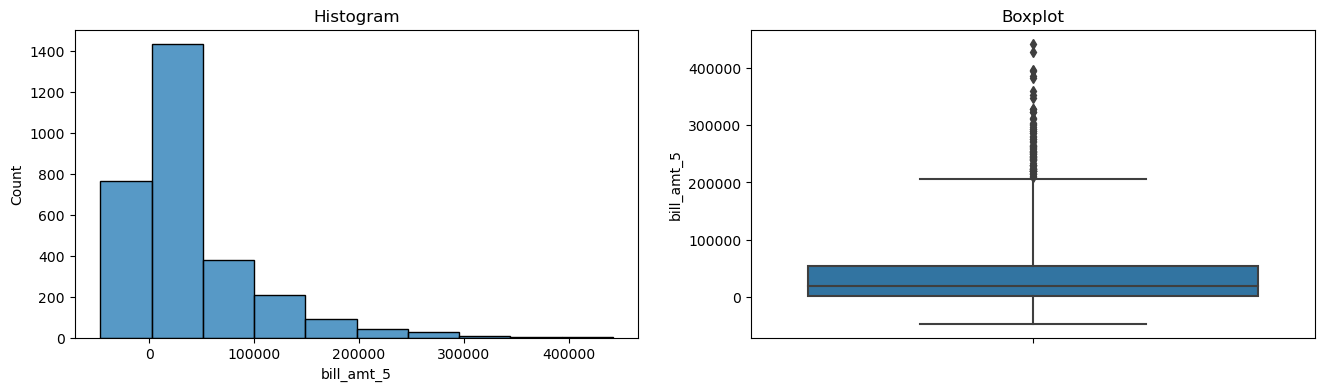


Skewness Value :  2.399943857538142


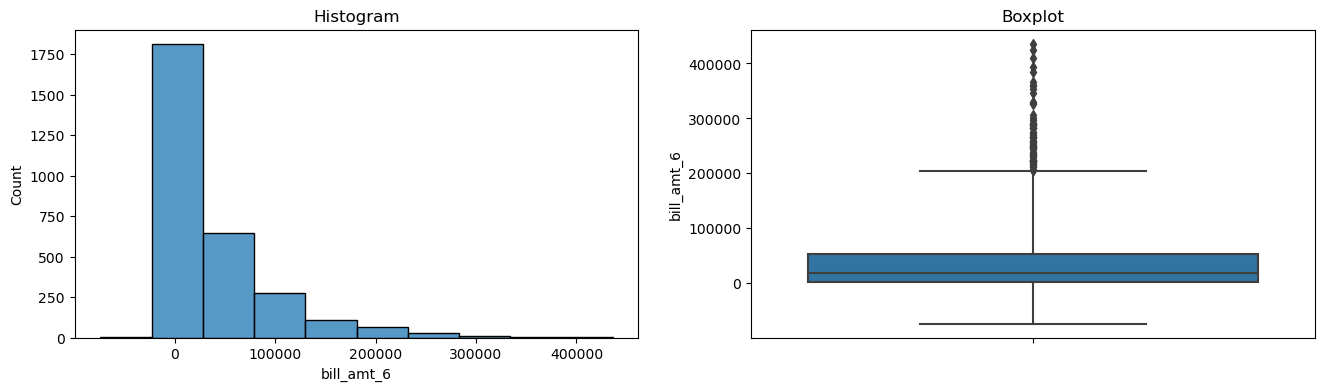


Skewness Value :  2.4319995109017865


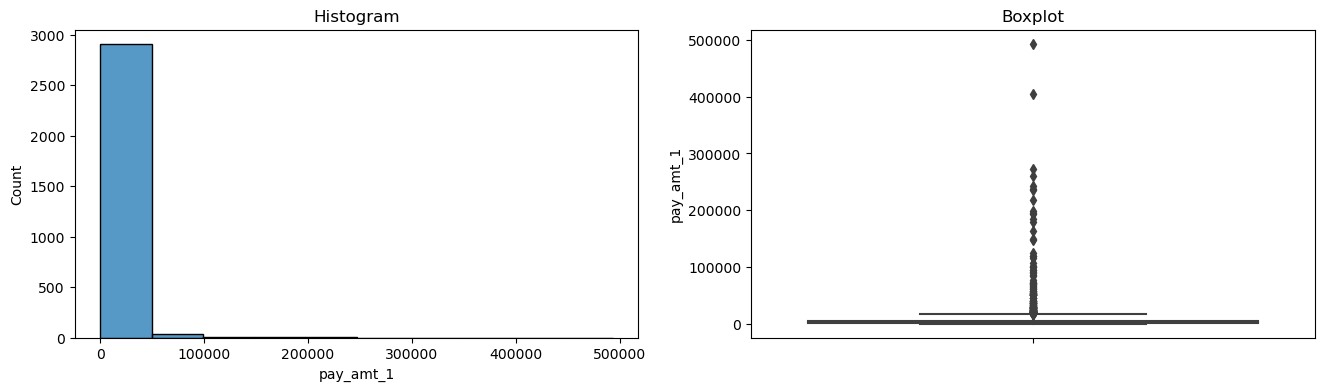


Skewness Value :  11.87590259977231


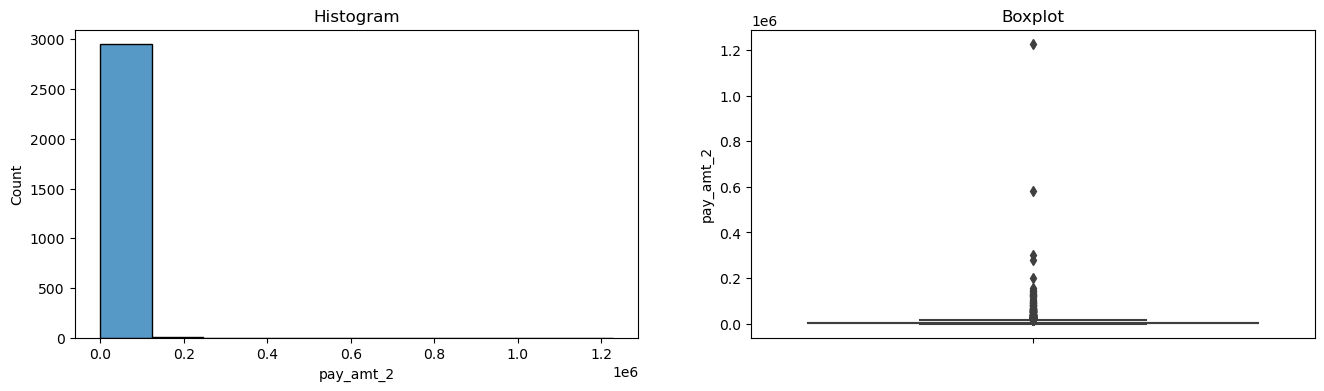


Skewness Value :  29.39979237780383


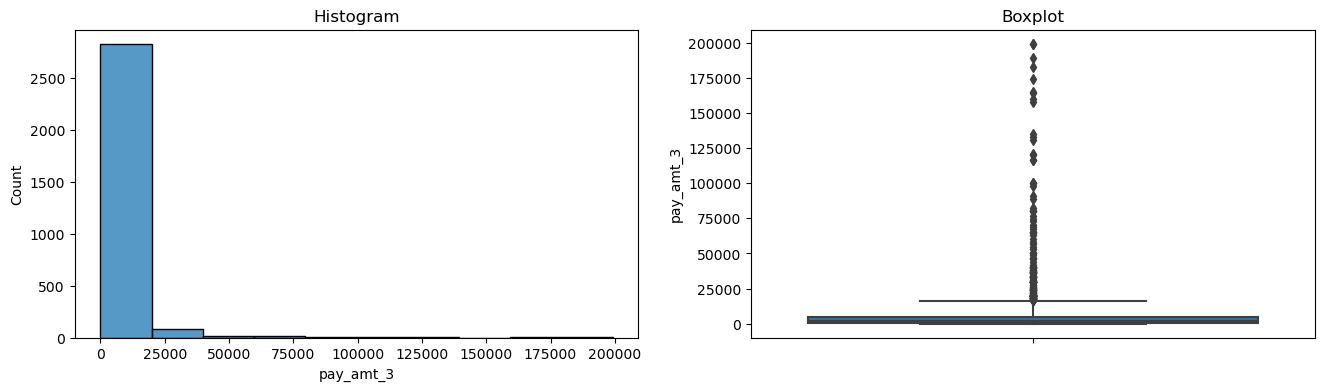


Skewness Value :  8.043463398022954


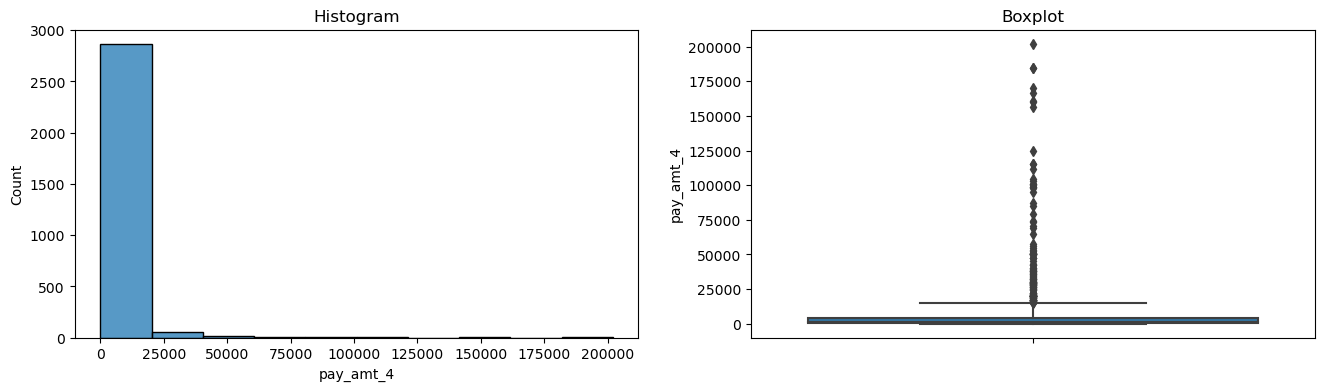


Skewness Value :  8.450287705274073


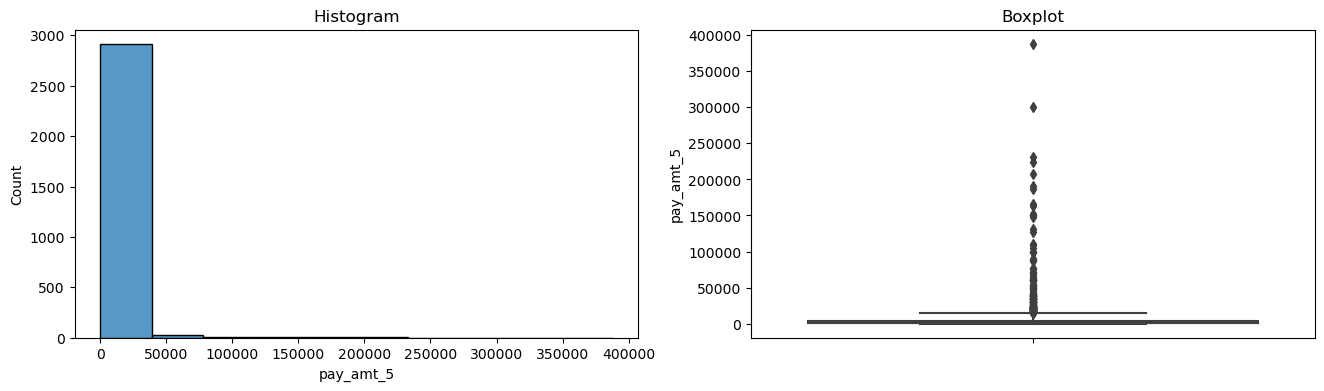


Skewness Value :  11.467169258420292


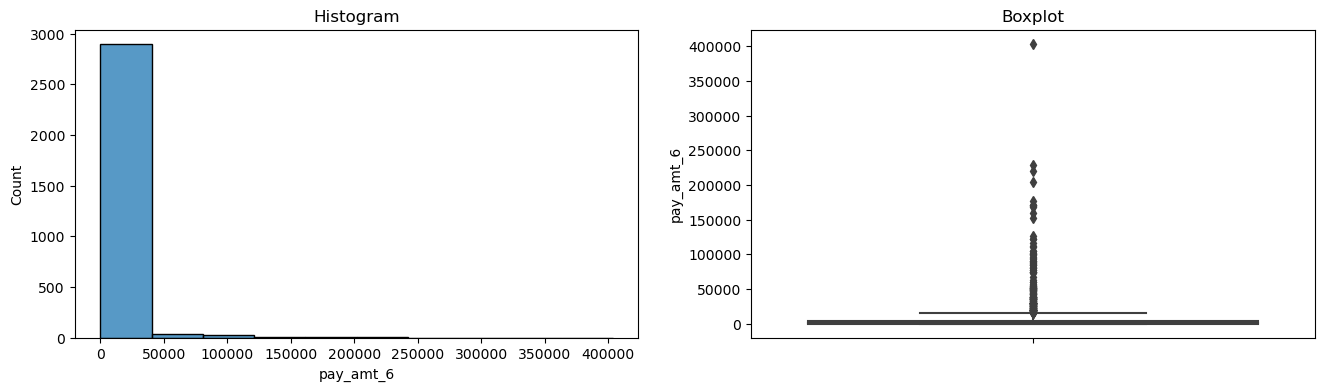


Skewness Value :  9.758714356332968


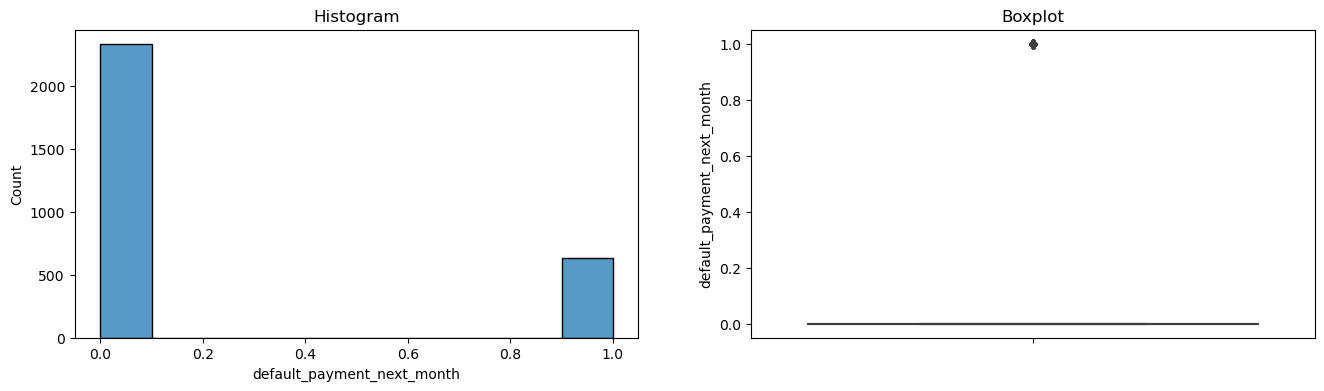


Skewness Value :  1.3936755154804943


In [27]:
# plot histogram dan boxplot untuk melihat outlier
for col in num_col:
    if col == 'education_num': # Skip fitur education_num karena merupakan fitur kategorikal yang menurut kami sudah diencode
        continue
    diagnostic_plots(df_clean, col)
    print('\nSkewness Value : ', df_clean[col].skew())

# VI. Feature Engineering

## Feature Selection

#### Phi_K Correlation Test

Disini kami menggunakan Phi_K Correlation Test karena cocok digunakan dalam seleksi fitur dengan target default_payment_next_month adalah karena target tersebut merupakan variabel diskrit dengan dua nilai, yaitu 0 dan 1.

interval columns not set, guessing: ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month']


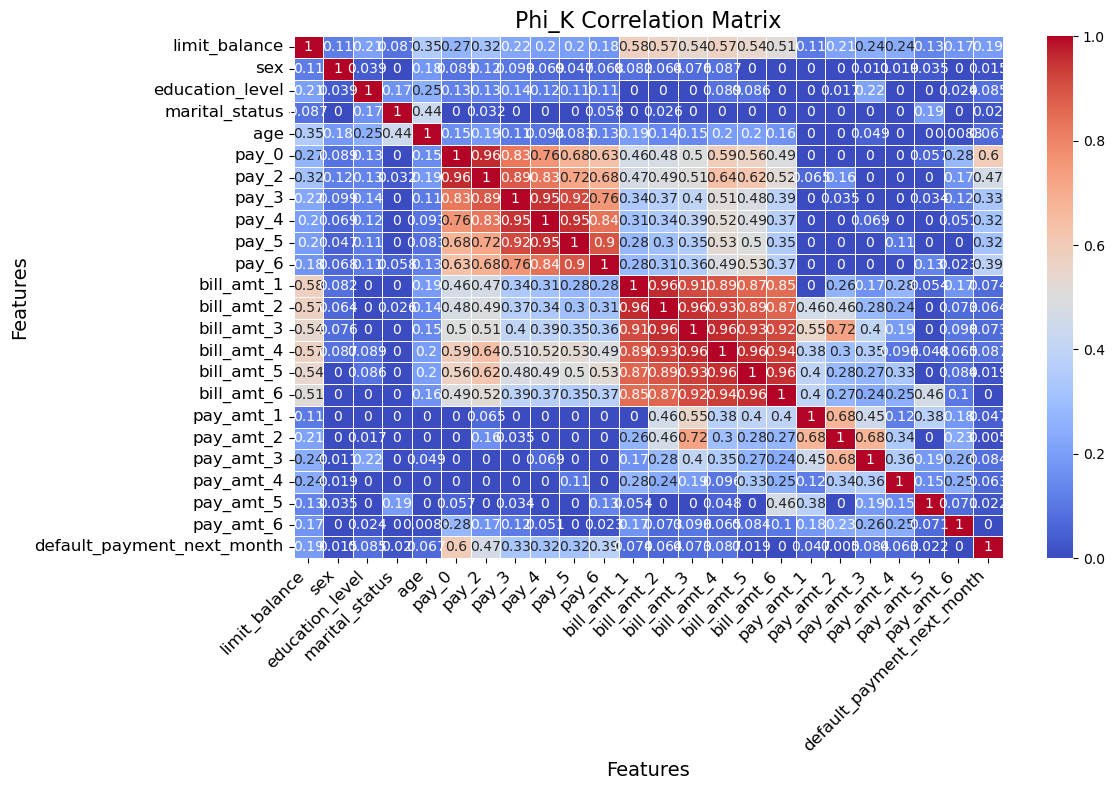

In [28]:
# get the phi_k correlation matrix between all variables
phik_matrix = df_clean.phik_matrix()

# plot the correlation matrix using seaborn heatmap
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax)

# set the title and axis labels
plt.title("Phi_K Correlation Matrix", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Features", fontsize=14)

# rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# display the plot
plt.tight_layout()
plt.show()

In [29]:
# cek korelasi yang memiliki signifikansi terhadap income_bracket
df_clean.phik_matrix().default_payment_next_month.sort_values(ascending=False)

interval columns not set, guessing: ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month']


default_payment_next_month    1.000000
pay_0                         0.596572
pay_2                         0.468335
pay_6                         0.386559
pay_3                         0.334726
pay_4                         0.318688
pay_5                         0.315415
limit_balance                 0.191907
bill_amt_4                    0.087360
education_level               0.085359
pay_amt_3                     0.083774
bill_amt_1                    0.073974
bill_amt_3                    0.073073
age                           0.067038
bill_amt_2                    0.064086
pay_amt_4                     0.062588
pay_amt_1                     0.046866
pay_amt_5                     0.022282
marital_status                0.020055
bill_amt_5                    0.019495
sex                           0.015281
pay_amt_2                     0.004992
bill_amt_6                    0.000000
pay_amt_6                     0.000000
Name: default_payment_next_month, dtype: float64

Insight yang dapat diambil dari tabel di atas adalah:

- Variabel pay_0 memiliki korelasi tertinggi dengan default_payment_next_month, yaitu sebesar 0.596572. Ini menunjukkan bahwa keterlambatan pembayaran bulan sebelumnya (pay_0) adalah faktor yang sangat penting dalam memprediksi kemungkinan pembayaran terlambat pada bulan berikutnya.

- Variabel pay_2, pay_6, pay_3, pay_4, pay_5 juga memiliki korelasi yang cukup tinggi dengan default_payment_next_month, dengan nilai 0.468335, 0.386559, dan 0.334726 masing-masing. Hal ini menunjukkan bahwa keterlambatan pembayaran dalam beberapa bulan sebelumnya juga dapat mempengaruhi kemungkinan pembayaran terlambat pada bulan berikutnya.

- Variabel limit_balance, bill_amt_4, dan education_level memiliki korelasi yang relatif lebih rendah dengan default_payment_next_month dibandingkan variabel-variabel di atas, namun masih berpengaruh signifikan dalam memprediksi kemungkinan pembayaran terlambat.

- Variabel pay_amt_6 dan bill_amt_6 kebawah tidak memiliki korelasi dengan default_payment_next_month, artinya variabel ini tidak berpengaruh dalam memprediksi kemungkinan pembayaran terlambat pada bulan berikutnya.

Dengan pertimbangan tersebut kami putuskan untuk mengambil variable yang akan kami gunakan yaitu 'pay_0', 'limit_balance', 'pay_2', 'pay_6', 'pay_3', 'pay_4', 'pay_5'.

In [30]:
df_selected = df_clean[['pay_0', 'limit_balance', 'pay_2', 'pay_6', 'pay_3', 'pay_4', 'pay_5', 'default_payment_next_month']]
df_selected.head()

,pay_0,limit_balance,pay_2,pay_6,pay_3,pay_4,pay_5,default_payment_next_month
0,0,80000,0,0,0,0,0,1
1,0,200000,0,0,0,0,0,0
2,0,20000,0,0,0,0,0,1
3,0,260000,0,0,0,0,0,0
4,0,150000,0,0,0,-1,0,0


#### Checking VIF


- VIF (Variance Inflation Factor) digunakan untuk mengevaluasi multicollinearity atau adanya ketergantungan antara variabel-variabel independen dalam model regresi. Jika terdapat multicollinearity, maka koefisien regresi yang diperoleh dapat menjadi tidak stabil dan sulit untuk diinterpretasikan.

In [31]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [32]:
calc_vif(df_selected[['pay_0', 'limit_balance', 'pay_2', 'pay_6', 'pay_3', 'pay_4', 'pay_5']])

,variables,VIF
0,pay_0,1.850244
1,limit_balance,1.123239
2,pay_2,3.131830
3,pay_6,3.210091
4,pay_3,3.401713
5,pay_4,4.080875
6,pay_5,4.811418


- VIF yang melebihi 5 atau 10 menunjukkan multikolinearitas yang tinggi antara variabel independen ini dengan variabel lainnya

- Berdasarkan nilai Variance Inflation Factor (VIF) yang diberikan, variabel yang paling signifikan dalam memprediksi kemungkinan gagal bayar pada kredit adalah pay_0 dan limit_balance. Hal ini dikarenakan nilai VIF yang rendah menunjukkan bahwa tidak terdapat multikolinearitas yang signifikan antara variabel-variabel tersebut dengan variabel lainnya. Sedangkan, variabel pay_2, pay_3, pay_4, pay_5, dan pay_6 memiliki nilai VIF yang cukup tinggi, namun masih bisa digunakan karena belum sampai 5.

## Cardinality Checking

In [33]:
# menampilkan jumlah label unik dari kolom-kolom yang bertipe numerik pada DataFrame 'df_selected'
df_selected.select_dtypes(include='number').nunique()

pay_0                         11
limit_balance                 59
pay_2                         10
pay_6                          8
pay_3                          9
pay_4                         10
pay_5                          9
default_payment_next_month     2
dtype: int64

In [34]:
# menampilkan semua nilai unik dari beberapa kolom pada DataFrame 'df_selected'
kolom = ['pay_0', 'limit_balance', 'pay_2', 'pay_6', 'pay_3', 'pay_4', 'pay_5']
for k in kolom:
    print(k + ':', df_selected[k].unique())


pay_0: [ 0  2  1 -1 -2  3  4  5  6  7  8]
limit_balance: [ 80000 200000  20000 260000 150000 300000 130000 500000 230000 460000
 780000 170000 320000 290000 240000 340000 360000 380000 180000 100000
  90000  50000 160000  70000 280000 220000  30000 120000  10000 470000
 310000 140000  60000 110000 430000 210000 490000 330000 250000 400000
 370000 440000 700000 530000 390000 410000 270000 560000  40000 680000
 480000 190000 350000 420000 510000 800000 450000 750000 620000]
pay_2: [ 0 -1  2  3 -2  4  1  5  6  7]
pay_6: [ 0 -1  2  3 -2  4  6  7]
pay_3: [ 0  2 -2  3 -1  4  5  6  7]
pay_4: [ 0 -1  2  3  4  5  6  7  8 -2]
pay_5: [ 0  2  3  4  5  6  7 -1 -2]


Karena data yang kita pilih adalah numerik (numerical), maka cardinality tidak perlu di-handle.

## Data Preprosesing

In [35]:
df_selected.head()

,pay_0,limit_balance,pay_2,pay_6,pay_3,pay_4,pay_5,default_payment_next_month
0,0,80000,0,0,0,0,0,1
1,0,200000,0,0,0,0,0,0
2,0,20000,0,0,0,0,0,1
3,0,260000,0,0,0,0,0,0
4,0,150000,0,0,0,-1,0,0


## Splitting between X (Features) and y (Target)

In [36]:
#split antara fitur dan target
X = df_selected.drop('default_payment_next_month', axis=1) # Fitur
y = df_selected['default_payment_next_month']              # Target

In [37]:
# Splitting antara Train-Set and Test-Set
X_train,X_test, y_train, y_test= train_test_split(X, y, stratify=y,test_size=0.2, random_state=42)
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(2371, 7)
(593, 7)
(2371,)
(593,)


In [38]:
# fitur numerik 
nums_col = ['pay_0', 'limit_balance', 'pay_2', 'pay_6', 'pay_3', 'pay_4', 'pay_5']

## Handling Outlier

In [39]:
# fungsi untuk membuat histogram dan boxplot dari suatu fitur
def plot_diagnostic(df_selected, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df_selected[col],ax = axes[0], bins=10)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df_selected[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df_selected[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1], whis=1.5)
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df_selected[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df_selected[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' is normally distributed".format(col))
    elif df_selected[col].skew() > 0.5 and df[col].skew() <= 1 :
        print("Columns '{}' is moderately right skewed".format(col))
    elif df_selected[col].skew() > 1:
        print("Columns '{}' is highly right skewed".format(col))
    elif df_selected[col].skew() < -0.5 and df[col].skew() >= -1 :
        print("Columns '{}' is moderately left skewed".format(col))
    elif df_selected[col].skew() < -1:
        print("Columns '{}' is highly left skewed".format(col))

In [40]:
# fungsi untuk mendapatkan upper dan lower boundary dari suatu distribusi
def find_skewed_boundaries(df_selected, variable, distance):
    IQR = df_selected[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df_selected[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df_selected[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

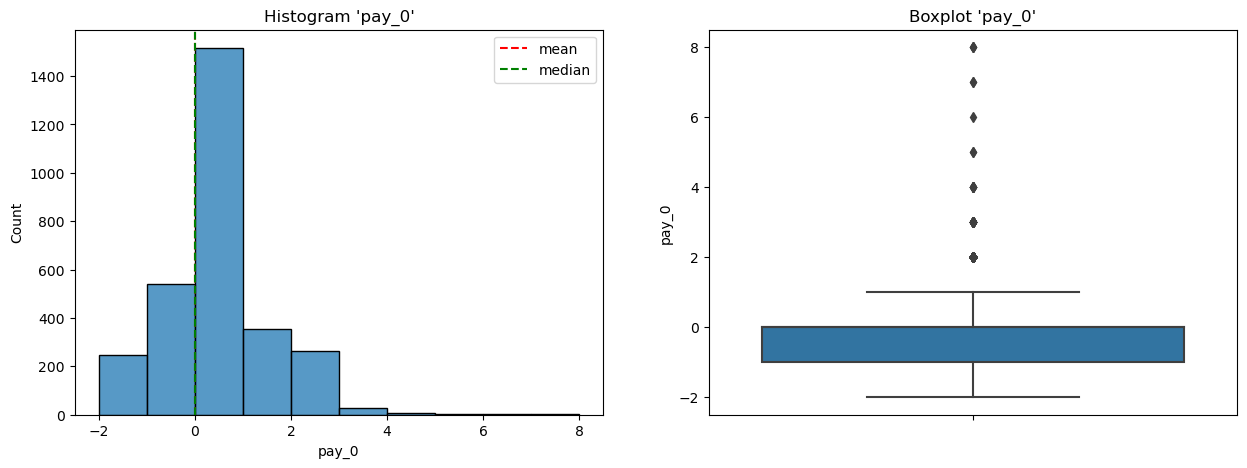

pay_0 Kurtosis: 4.173522219514879
pay_0 Skewness: 0.9267902583584399
Columns 'pay_0' is moderately right skewed


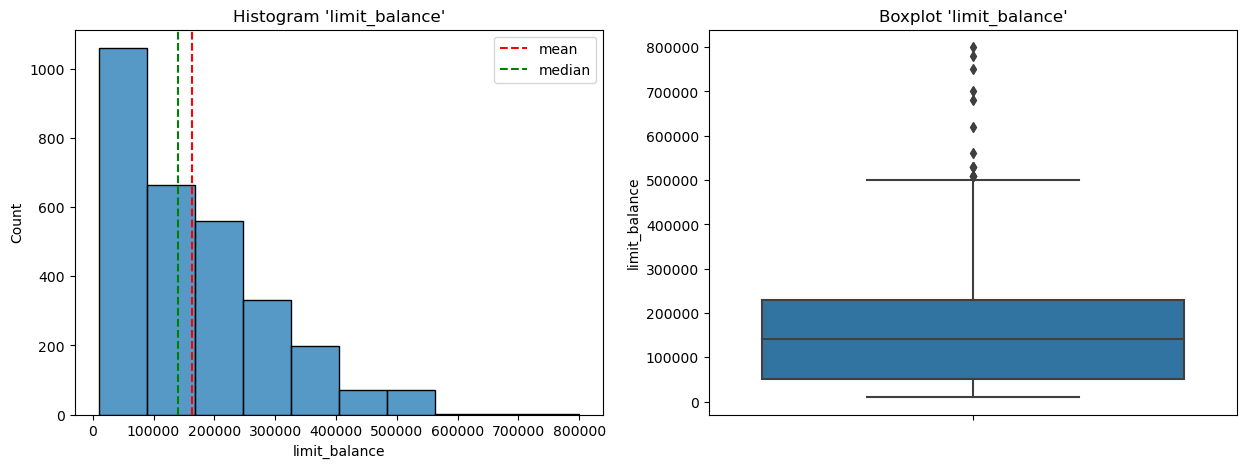

limit_balance Kurtosis: 0.7003286116778198
limit_balance Skewness: 1.0004416437793324
Columns 'limit_balance' is highly right skewed


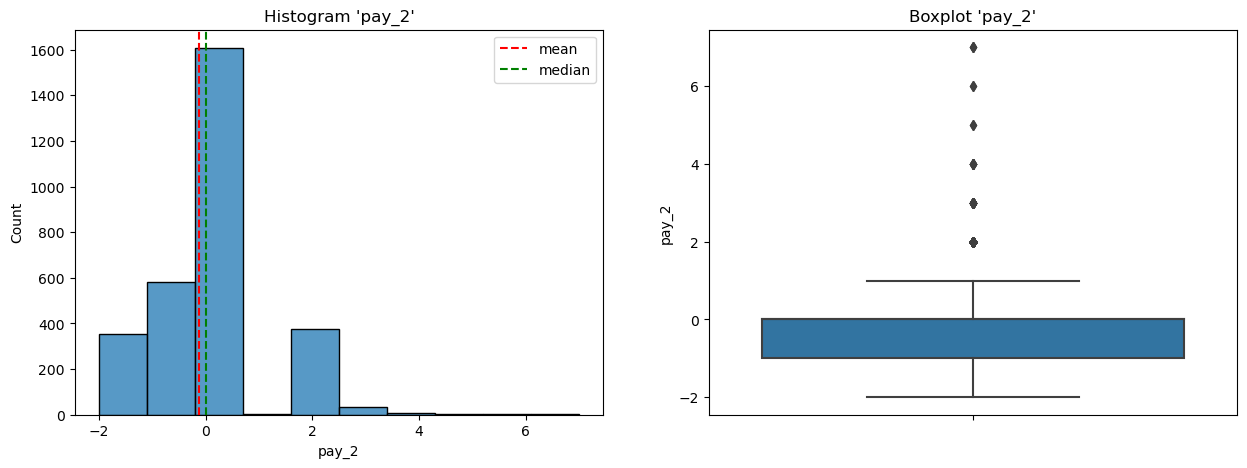

pay_2 Kurtosis: 2.142303006054438
pay_2 Skewness: 0.861761990097645
Columns 'pay_2' is moderately right skewed


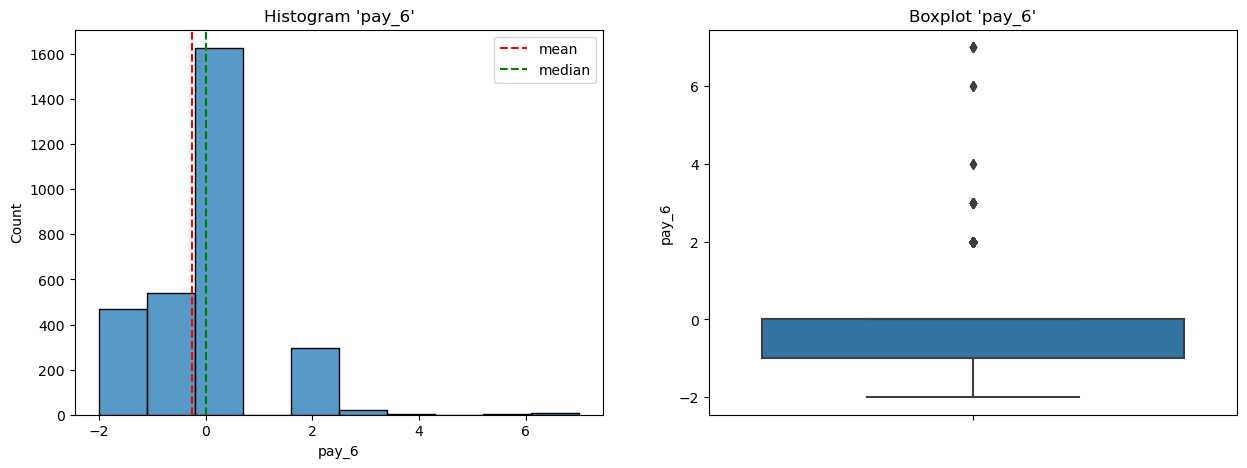

pay_6 Kurtosis: 3.6305278543824917
pay_6 Skewness: 0.978760090411627
Columns 'pay_6' is moderately right skewed


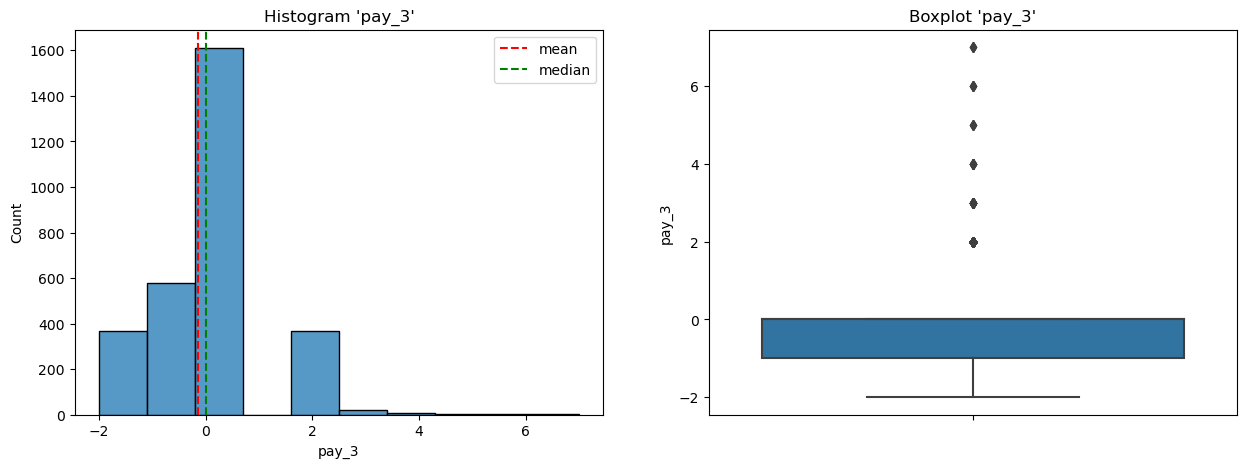

pay_3 Kurtosis: 2.5987856549692276
pay_3 Skewness: 0.931460104889967
Columns 'pay_3' is moderately right skewed


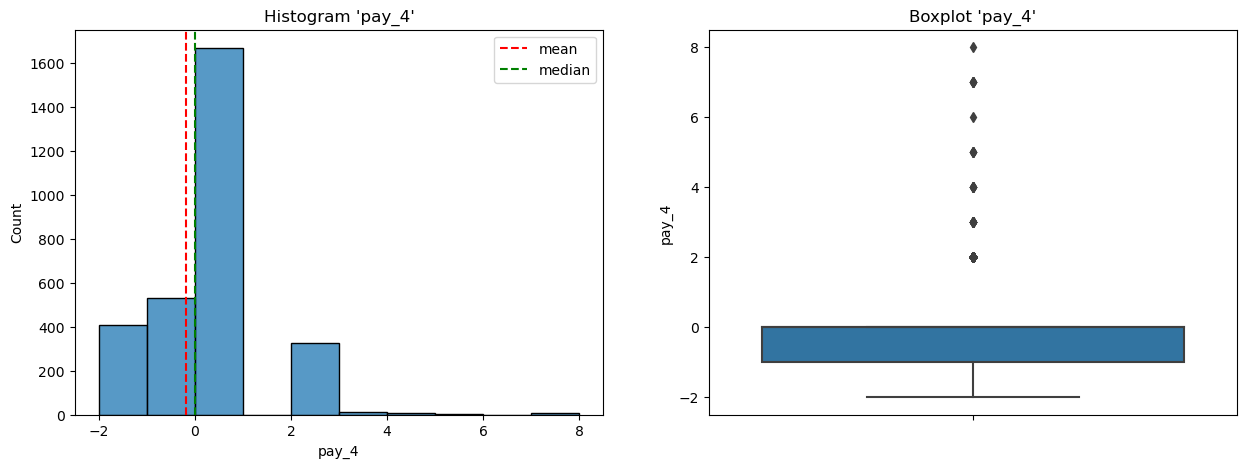

pay_4 Kurtosis: 4.221387283281387
pay_4 Skewness: 1.1015042414613136
Columns 'pay_4' is highly right skewed


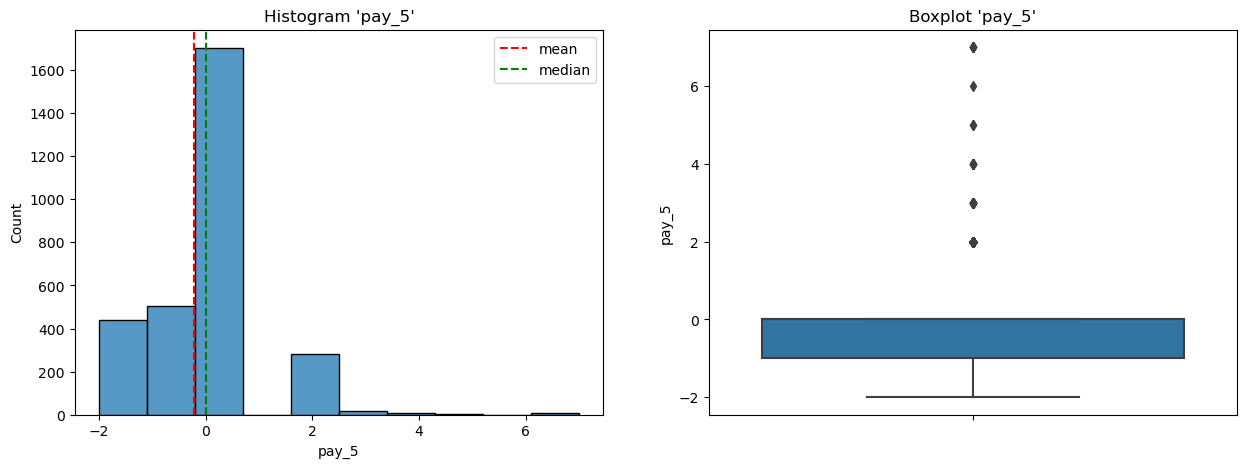

pay_5 Kurtosis: 4.19541173955713
pay_5 Skewness: 1.0601731604244327
Columns 'pay_5' is highly right skewed


In [41]:
# plot semua fitur pada data train untuk melihat distribusi sekaligus outliernya
for i in range(len(nums_col)):
    plot_diagnostic(df_selected, nums_col[i])

Insight dari hasil tersebut adalah:

- Semua fitur numerik memiliki skewness (asimetri) yang lebih besar dari -0.5 dan lebih ke arah positif, sehingga dapat dikategorikan sebagai fitur dengan distribusi yang condong ke kanan atau "skewed right".

- Fitur "pay_0", "pay_2", "pay_3", dan "pay_6" memiliki skewness yang hampir sama, yaitu sekitar 0.93. Hal ini menunjukkan bahwa distribusi keempat fitur tersebut memiliki pola yang serupa dalam hal jumlah nilai yang lebih tinggi daripada nilai rata-rata. Hal ini mungkin disebabkan oleh kecenderungan pengguna kartu kredit untuk membayar tagihan kartu kredit mereka dengan cara tertentu, misalnya membayar lebih banyak dari yang seharusnya pada bulan tertentu dan kemudian membayar kurang pada bulan-bulan berikutnya.

- Fitur "pay_4" dan "pay_5" memiliki skewness yang lebih tinggi dibandingkan fitur yang lainnya, yaitu sekitar 1.06 dan 1.10, masing-masing. Hal ini menunjukkan bahwa distribusi keempat fitur tersebut memiliki pola yang lebih ekstrem, dengan beberapa nilai yang jauh lebih tinggi daripada yang lain. Hal ini mungkin menunjukkan adanya outlier pada data yang perlu diperhatikan saat melakukan analisis lebih lanjut.

- Fitur "limit_balance" memiliki skewness sekitar 1.00, sehingga juga memiliki distribusi yang condong ke kanan. Perlu diperhatikan bahwa fitur ini memiliki nilai yang sangat bervariasi, dari 10.000 hingga 800.000. Hal ini dapat mempengaruhi hasil analisis dan perlu diperhatikan saat melakukan normalisasi atau scaling pada data.

Namun disini kita hanya akan menghandle Limit_balance karena pay_n karena data numerik fitur pay_n merupakan hasil encoding.

Selanjutnya kita akan menghitung dan menampilkan persentase outlier dari tiap fitur pada dataset. Kemudian, outlier dikelompokkan ke dalam dua kategori yaitu Trimmed Outliers dan Censored Outliers, tergantung pada persentase outlier pada setiap fitur. Jika persentase outlier kurang dari 5%, maka outlier dianggap sebagai Trimmed Outliers. Sebaliknya, jika persentase outlier lebih besar dari atau sama dengan 5%, maka outlier dianggap sebagai Censored Outliers.

Insight yang bisa diambil adalah kita dapat mengetahui fitur mana saja yang memiliki outlier, dan apakah outlier tersebut termasuk Trimmed Outliers atau Censored Outliers. Informasi ini penting untuk melakukan handling pada outlier tersebut. Selain itu, dengan mengetahui persentase outlier pada tiap fitur, kita juga dapat mempertimbangkan apakah fitur tersebut perlu diikutkan dalam model atau tidak.

In [42]:
# variable container upper dan lower limit semua kolom numerik
upper = []
lower = []

In [43]:
# simpan value upper dan lower ke dalam list yang sudah dibuat sebelumnya
for i in range(len(nums_col)):
    upper_, lower_ = find_skewed_boundaries(df_selected, variable=nums_col[i], distance=1.5)
    upper.append(upper_)
    lower.append(lower_)

In [44]:
# simpan value upper dan lower ke dictionary sesuai nama fiturnya dengan format (nama_fitur: upper,lower)
low_up_dict = {}
for i in range(len(nums_col)):
    low_up_dict[nums_col[i]]=[lower[i],upper[i]]

In [45]:
# menampilan dicionary lower dan upper limit value suatu fitur
low_up_dict

{'pay_0': [-2.5, 1.5],
 'limit_balance': [-220000.0, 500000.0],
 'pay_2': [-2.5, 1.5],
 'pay_6': [-2.5, 1.5],
 'pay_3': [-2.5, 1.5],
 'pay_4': [-2.5, 1.5],
 'pay_5': [-2.5, 1.5]}

In [46]:
#list containing outliers percentage
trimmed_outliers = []
censored_outliers = []
# menghitung dan menampilkan persentase outlier dari tiap fitur
for i in range(len(nums_col)):
    num_outlier = df_selected[nums_col[i]][(df_selected[nums_col[i]] > upper[i]) | (df_selected[nums_col[i]] < lower[i])].shape[0]
    outlier_percentage = num_outlier/df_selected.shape[0]*100
    if (outlier_percentage<5):
        trimmed_outliers.append([nums_col[i],outlier_percentage])
    else:
        censored_outliers.append([nums_col[i],outlier_percentage])

print("Trimmed Outliers Consideration:")
for i in trimmed_outliers:
    print(f'\tPercentage of outlier in \033[1m{i[0]}\033[0m is {i[1]:.2f}%')

print("Censored Outliers Consideration:")
for i in censored_outliers:
    print(f'\tPercentage of outlier in \033[1m{i[0]}\033[0m is {i[1]:.2f}%')

Trimmed Outliers Consideration:
	Percentage of outlier in limit_balance is 0.47%
Censored Outliers Consideration:
	Percentage of outlier in pay_0 is 10.32%
	Percentage of outlier in pay_2 is 14.20%
	Percentage of outlier in pay_6 is 11.10%
	Percentage of outlier in pay_3 is 13.77%
	Percentage of outlier in pay_4 is 12.08%
	Percentage of outlier in pay_5 is 10.73%


- Hasil pengecheckan kami, kami temukan bahwa, Pada fitur limit_balance hanya terdapat 0.42% data yang tergolong sebagai outliers, dan hal ini menunjukkan bahwa data pada fitur limit_balance relatif homogen dan tidak terlalu memiliki data yang ekstrem pada kedua sisi distribusinya. Dalam hal ini, trimming dapat digunakan sebagai metode yang efektif untuk mengatasi outliers pada fitur limit_balance.

- pada kolom pay_0, pay_2, pay_6, pay_3, pay_4, dan pay_5, yang semuanya memiliki persentase outlier yang cukup tinggi, yaitu antara 10.46% hingga 13.76%. Hal ini menunjukkan bahwa fitur-fitur tersebut memiliki banyak outlier yang signifikan dan perlu ditangani dengan baik menggunakan metode censoring. namun tidak kami handle karena data numerik fitur pay_n merupakan hasil encoding

#### Trimming

In [47]:
# hitung persentil 5 dan 95
percentile_5 = np.percentile(X_train['limit_balance'], 5)
percentile_95 = np.percentile(X_train['limit_balance'], 95)

# lakukan trimming pada fitur limit_balance
X_train['limit_balance'] = np.where(X_train['limit_balance'] < percentile_5, percentile_5, X_train['limit_balance'])
X_train['limit_balance'] = np.where(X_train['limit_balance'] > percentile_95, percentile_95, X_train['limit_balance'])


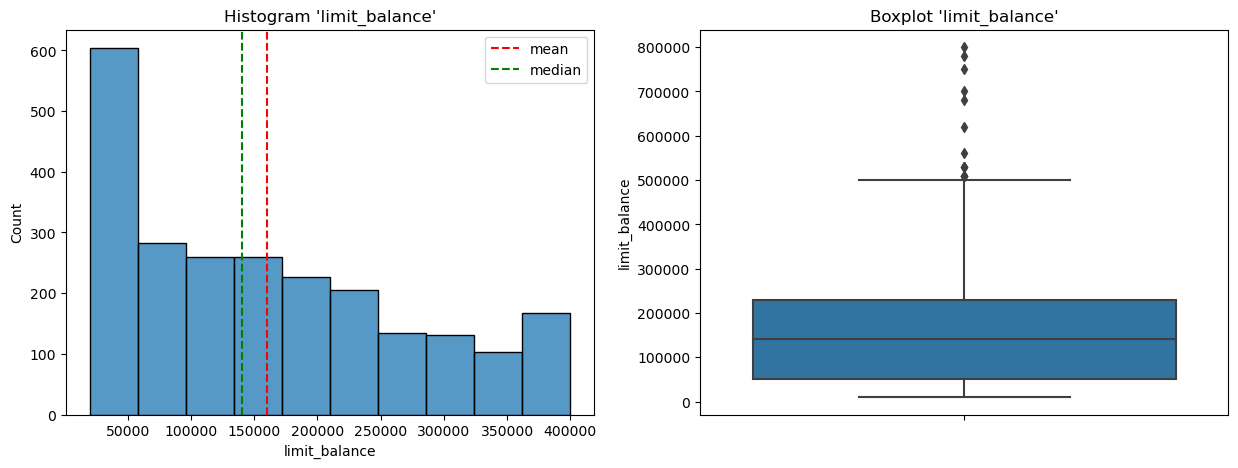

limit_balance Kurtosis: 0.7003286116778198
limit_balance Skewness: 1.0004416437793324


In [48]:
# fitur limit_balance setelah dilakukan trimming
plot_diagnostic(X_train, 'limit_balance')

- nilai before after triming relatif sama karena distribusi data sudah simetris atau mendekati simetris.

## Feature Scaling 

- Untuk scaling, penulis akan melakukan scaling pada fitur data numerik kontinu dengan minmax scaler

In [49]:
X_train

,pay_0,limit_balance,pay_2,pay_6,pay_3,pay_4,pay_5
489,0,130000.0,0,0,0,0,0
1743,0,240000.0,0,0,0,0,2
835,0,210000.0,0,0,0,0,0
1985,3,80000.0,2,3,2,2,3
1246,0,50000.0,0,0,0,0,0
...,...,...,...,...,...,...,...
153,0,170000.0,0,0,0,0,0
93,0,70000.0,0,0,0,0,0
2052,0,20000.0,0,2,0,-1,-1
2677,-2,250000.0,-2,-2,-2,-2,-2


In [50]:
scaler = MinMaxScaler()

X_train_s = scaler.fit_transform(X_train)
X_train_s


array([[0.2       , 0.28947368, 0.22222222, ..., 0.22222222, 0.2       ,
        0.22222222],
       [0.2       , 0.57894737, 0.22222222, ..., 0.22222222, 0.2       ,
        0.44444444],
       [0.2       , 0.5       , 0.22222222, ..., 0.22222222, 0.2       ,
        0.22222222],
       ...,
       [0.2       , 0.        , 0.22222222, ..., 0.22222222, 0.1       ,
        0.11111111],
       [0.        , 0.60526316, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.21052632, 0.22222222, ..., 0.22222222, 0.2       ,
        0.22222222]])

## Feature Encoding

- Kami tidak menggunakan encoding karena data kategorikal sudah dalam kondisi yang ter-encoding

## Handling Imbalance Target

In [51]:
y_train.value_counts()

0    1863
1     508
Name: default_payment_next_month, dtype: int64

In [52]:
from imblearn.over_sampling import SMOTE

over = SMOTE(random_state=21, sampling_strategy='minority')
X_train_s, y_train = over.fit_resample(X_train,y_train)
y_train.value_counts()

0    1863
1    1863
Name: default_payment_next_month, dtype: int64

#### Pepiline

In [53]:
# definisikan pipeline untuk data numerik
num_pipeline = Pipeline([
                ('scaler', MinMaxScaler())
    ])

# fit_transform data train
num_train = num_pipeline.fit_transform(X_train_s)
num_train

array([[0.2       , 0.28947368, 0.22222222, ..., 0.22222222, 0.2       ,
        0.22222222],
       [0.2       , 0.57894737, 0.22222222, ..., 0.22222222, 0.2       ,
        0.44444444],
       [0.2       , 0.5       , 0.22222222, ..., 0.22222222, 0.2       ,
        0.22222222],
       ...,
       [0.2       , 0.73684211, 0.22222222, ..., 0.22222222, 0.2       ,
        0.22222222],
       [0.3       , 0.28947368, 0.22222222, ..., 0.22222222, 0.2       ,
        0.22222222],
       [0.5       , 0.        , 0.44444444, ..., 0.22222222, 0.2       ,
        0.44444444]])

In [54]:
# cek apakah num_train dan X_train_s sama
np.allclose(num_train, X_train_s)

False

In [55]:
# transform data test menggunakan full pipeline
test_tr = num_pipeline.transform(X_test)

In [56]:
test_tr

array([[0.3       , 0.05263158, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.07894737, 0.22222222, ..., 0.22222222, 0.2       ,
        0.22222222],
       [0.2       , 0.10526316, 0.22222222, ..., 0.22222222, 0.2       ,
        0.11111111],
       ...,
       [0.2       , 0.13157895, 0.22222222, ..., 0.22222222, 0.2       ,
        0.22222222],
       [0.4       , 0.18421053, 0.22222222, ..., 0.22222222, 0.2       ,
        0.22222222],
       [0.2       , 0.07894737, 0.22222222, ..., 0.22222222, 0.2       ,
        0.22222222]])

# VII. Model Definition

Model yang akan digunakan adalah: 
1. Logistic Regression:

Kelebihan:

- Mudah diinterpretasikan.
- Dapat digunakan untuk klasifikasi biner atau multikelas.
- Mampu mengatasi overfitting dengan regulasi.

Kekurangan:

- Tidak efektif ketika terdapat banyak variabel prediktor yang independen.
- Tidak dapat menangani interaksi antar prediktor.

2. SVM (Support Vector Machine):

Kelebihan:

- Dapat mengatasi masalah kelas tidak seimbang.
- Dapat mengatasi kasus dengan dimensi yang sangat tinggi.

Kekurangan:

- Membutuhkan waktu yang lama untuk melatih model.
- Tidak efektif jika jumlah sampel yang sangat besar.

3. Decision Tree:

Kelebihan:

- Mudah diinterpretasikan.
- Dapat digunakan untuk klasifikasi atau regresi.
- Dapat menangani data kategorikal dan numerikal.

Kekurangan:

- Tidak stabil dan mudah overfitting.
- Tidak dapat menangani data yang kompleks dan kasus dengan jumlah variabel yang sangat banyak.

4. Random Forest:

Kelebihan:

- Dapat mengatasi overfitting.
- Dapat mengatasi masalah kelas tidak seimbang.
- Dapat menangani data kategorikal dan numerikal.

Kekurangan:

Sulit diinterpretasikan.
Membutuhkan waktu yang lama untuk melatih model.

5. KNN (K-Nearest Neighbor):

Kelebihan:

- Mudah diimplementasikan dan dipahami.
- Dapat digunakan untuk klasifikasi atau regresi.

Kekurangan:

- Sensitif terhadap parameter k (jumlah tetangga terdekat).
- Tidak efektif jika jumlah prediktor yang sangat besar.

6. Naive Bayes:

Kelebihan:
- Mudah diimplementasikan dan cepat dalam melatih model.
- Efektif pada data yang kompleks.

Kekurangan:

- Tidak efektif jika prediktor terlalu berkorelasi.
- Asumsi naive independence sering tidak realistis.

7. AdaBoost Classifier:

Kelebihan:

- Mampu meningkatkan akurasi prediksi dari model yang lemah dan tidak stabil, sehingga model yang dihasilkan lebih kuat dan stabil
- Mampu mengatasi masalah overfitting dengan membatasi kompleksitas model
- Dapat digunakan untuk memprediksi kelas pada masalah klasifikasi biner atau multikelas

Kekurangan:

- Sangat sensitif terhadap data pencilan (outlier) yang dapat mempengaruhi model secara signifikan
- Cenderung overfitting jika terdapat banyak model yang terlalu kompleks atau jika parameter tuning tidak diatur dengan benar
- Memerlukan waktu dan sumber daya komputasi yang cukup besar untuk melatih model dan menghasilkan prediksi yang akurat

Sesuai kriteria Milestone 1, kita akan melakukan training data pada semua model terlebih dahulu dengan parameter default menggunakan cross validation. Kemudian model terbaik akan dipilih dan dilakukan hyperparameter tuning, dan terakhir mengevaluasi performa sebelum dan sesudah melakukan tuning pada model tersebut.

In [57]:
# instansiasi classifier dengan default parameter
logreg = LogisticRegression(random_state=0)
svc = SVC(random_state=0)
dtc = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
knn = KNeighborsClassifier()
nb = GaussianNB()
ab= AdaBoostClassifier()

### Cross Validation

In [58]:
# Define Skfold using StratifiedKFold
skfold=StratifiedKFold(n_splits=5, random_state=7, shuffle=True)

# checking cross validation score
cv_log_model = cross_val_score(logreg, num_train, y_train, cv=skfold, scoring="recall")
cv_svm_model = cross_val_score(svc, num_train, y_train, cv=skfold, scoring="recall")
cv_dt_model = cross_val_score(dtc, num_train, y_train, cv=skfold, scoring="recall")
cv_rf_model = cross_val_score(rfc, num_train, y_train, cv=skfold, scoring="recall")
cv_knn_model = cross_val_score(knn, num_train, y_train, cv=skfold, scoring="recall")
cv_nb_model = cross_val_score(nb, num_train, y_train, cv=skfold, scoring="recall")
cv_ada_model = cross_val_score(ab, num_train, y_train, cv=skfold, scoring="recall")
name_model = []
cv_scores=0
for cv,name in zip([cv_log_model,cv_svm_model,cv_dt_model,cv_rf_model,cv_knn_model,cv_nb_model,cv_ada_model],['log_model','svm_model','dt_model','rf_model','knn_model','nb_model','ada_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

log_model
recall - All - Cross Validation  :  [0.6541555  0.69623656 0.64784946 0.6541555  0.66219839]
recall - Mean - Cross Validation :  0.6629190809766785
recall - Std - Cross Validation  :  0.017270020229908586
recall - Range of Test-Set       :  0.64564906074677 - 0.680189101206587
--------------------------------------------------
svm_model
recall - All - Cross Validation  :  [0.55227882 0.56989247 0.53494624 0.57372654 0.54155496]
recall - Mean - Cross Validation :  0.5544798062786473
recall - Std - Cross Validation  :  0.015241020042702051
recall - Range of Test-Set       :  0.5392387862359453 - 0.5697208263213493
--------------------------------------------------
dt_model
recall - All - Cross Validation  :  [0.7613941  0.74462366 0.71236559 0.71849866 0.74798928]
recall - Mean - Cross Validation :  0.736974256969068
recall - Std - Cross Validation  :  0.0185639807112817
recall - Range of Test-Set       :  0.7184102762577863 - 0.7555382376803498
--------------------------------

Dari hasil Cross Validasi didapatkan yang mendapat nilai paling tinggi yaitu pada model RandomForestClassifier, maka dari itu akan kita pilih untuk langkah modeling selanjutnya.


# VIII. Model Training

In [59]:
rfc.fit(num_train, y_train)

RandomForestClassifier(random_state=0)

# IX. Model Evaluation

Berikut merupakan evaluasi dari performa model yang telah di train. Disini kami menggunakan F1 Score karena F1 score memberikan keseimbangan antara presisi dan recall. Dalam beberapa kasus, kita mungkin lebih peduli dengan presisi atau recall tergantung pada aplikasi yang sedang kita gunakan. Namun, F1 score adalah metrik evaluasi yang berguna ketika kita ingin mempertimbangkan keduanya secara bersamaan.

Selain itu, F1 score juga cocok digunakan pada dataset yang tidak seimbang (imbalance) antara kelas positif dan negatif. Ketika dataset tidak seimbang, metrik evaluasi seperti akurasi dapat menjadi tidak informatif karena model dapat menjadi cenderung untuk memprediksi kelas mayoritas, dan ini dapat memberikan hasil yang salah dalam aplikasi praktis. Sebaliknya, F1 score dapat memberikan gambaran yang lebih baik tentang kinerja model pada kelas minoritas yang mungkin lebih penting untuk diidentifikasi dengan benar.

In [60]:
y_pred_train = rfc.predict(num_train)
y_pred_test = rfc.predict(test_tr)

In [61]:
print('RandomForestClassifier')
print('accuracy train score : ',accuracy_score(y_train,y_pred_train))
print('accuracy test score : ',accuracy_score(y_test,y_pred_test))

RandomForestClassifier
accuracy train score :  0.8668813741277509
accuracy test score :  0.7048903878583473


- Dari informasi yang diberikan, terlihat bahwa model Random Forest Classifier yang telah dibuat memiliki akurasi yang cukup baik pada data train dengan skor akurasi sebesar 0.87 atau sekitar 87%. Namun, pada data test model Random Forest Classifier hanya memiliki skor akurasi sebesar 0.70 atau sekitar 70% saja. Hal ini menunjukkan bahwa model Random Forest Classifier mungkin mengalami overfitting, yaitu model terlalu menyesuaikan diri dengan data train, sehingga tidak bisa digeneralisasi dengan baik pada data test.

In [62]:
# Display RandomForestClassifier Report
print('classification report train : \n',classification_report(y_train,y_pred_train),'\n')
print('classification report test : \n',classification_report(y_test,y_pred_test))

classification report train : 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1863
           1       0.90      0.83      0.86      1863

    accuracy                           0.87      3726
   macro avg       0.87      0.87      0.87      3726
weighted avg       0.87      0.87      0.87      3726
 

classification report test : 
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       466
           1       0.35      0.44      0.39       127

    accuracy                           0.70       593
   macro avg       0.59      0.61      0.60       593
weighted avg       0.73      0.70      0.72       593



In [63]:
# create function
def base_model_train_eval(model):
    mod = model
    mod.fit(num_train, y_train)

    mod_train = mod.predict(num_train)
    mod_test = mod.predict(test_tr)

    print(classification_report(y_train, mod_train))
    print(classification_report(y_test, mod_test))

In [64]:
base_model_train_eval(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1863
           1       0.90      0.83      0.86      1863

    accuracy                           0.87      3726
   macro avg       0.87      0.87      0.87      3726
weighted avg       0.87      0.87      0.87      3726

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       466
           1       0.35      0.43      0.39       127

    accuracy                           0.71       593
   macro avg       0.59      0.61      0.60       593
weighted avg       0.73      0.71      0.72       593



insight yang dapat diambil dari hasil evaluasi model:

- Precision: merupakan rasio dari jumlah prediksi positif yang benar dibandingkan dengan jumlah prediksi positif secara keseluruhan. Dalam kasus ini, precision yang dihasilkan cukup tinggi, yaitu sekitar 84% hingga 90%, tergantung pada kelas yang diprediksi.

- Recall: merupakan rasio dari jumlah prediksi positif yang benar dibandingkan dengan jumlah data aktual yang sebenarnya positif. Recall yang dihasilkan pada kelas 0 relatif lebih tinggi daripada pada kelas 1.

- F1-score: adalah ukuran rata-rata harmonis antara precision dan recall. Semakin tinggi F1-score, semakin baik performa model.

- Support: merupakan jumlah data aktual untuk setiap kelas.
Pada hasil evaluasi train set, model menghasilkan akurasi sebesar 0.87 atau 87%, dengan F1-score yang cukup tinggi, yaitu sekitar 0.87 pada kedua kelas. Hal ini menunjukkan model mampu melakukan klasifikasi dengan baik pada data yang digunakan untuk melatih model.

Namun, pada hasil evaluasi test set, terlihat adanya penurunan performa model dengan akurasi sebesar 0.72 atau 72% dan F1-score yang cukup rendah, yaitu sekitar 0.41 pada kelas 1. Hal ini menunjukkan kemungkinan adanya overfitting pada model, di mana model terlalu fokus pada data latih dan tidak mampu melakukan generalisasi dengan baik pada data uji yang baru. Oleh karena itu, diperlukan penanganan lebih lanjut seperti melakukan hyperparameter tuning atau memperluas dataset agar model dapat lebih baik dalam melakukan klasifikasi pada data baru.

#### Confusion Matrix

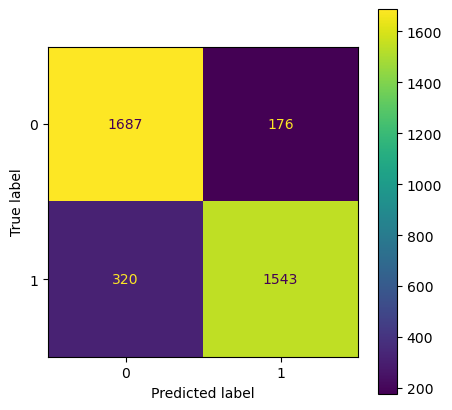

In [65]:
f,ax = plt.subplots(1,1,figsize=(5,5))
print(ConfusionMatrixDisplay.from_estimator(rfc, num_train, y_train, ax=ax))

- Dari confusion matrix tersebut, kita dapat melihat bahwa terdapat 1687 nilai kelas 0 (No) yang diprediksi benar (True Negative) dan 176 nilai kelas 0 yang diprediksi salah (False Positive). Sementara itu, terdapat 320 nilai kelas 1 (Yes) yang diprediksi benar (True Positive) dan 1543 nilai kelas 1 yang diprediksi salah (False Negative).

- Kesimpulan dari confusion matrix tersebut adalah model yang dibangun memiliki tingkat akurasi yang cukup baik dalam memprediksi kelas 0 (No), namun masih perlu ditingkatkan dalam memprediksi kelas 1 (Yes) karena terdapat banyak nilai False Negative yang cukup tinggi.

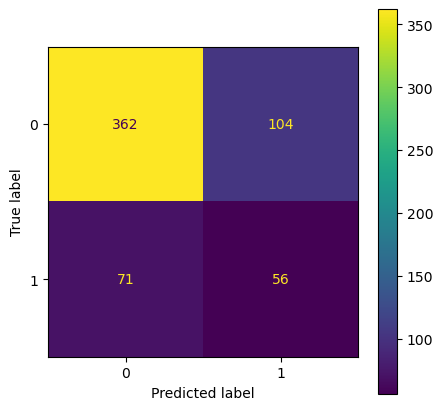

In [66]:
f,ax = plt.subplots(1,1,figsize=(5,5))
print(ConfusionMatrixDisplay.from_estimator(rfc, test_tr, y_test, ax=ax))

- Dari hasil visualisasi confusion matrix di atas, dapat dilihat bahwa pada data uji (test set), terdapat 362 nilai kelas 0 (No) yang diprediksi benar (True Negative) dan 104 nilai kelas 0 yang diprediksi salah (False Positive). Sementara itu, terdapat 71 nilai kelas 1 (Yes) yang diprediksi benar (True Positive) dan 56 nilai kelas 1 yang diprediksi salah (False Negative).

- Dari hasil visualisasi confusion matrix pada data uji (test set), dapat disimpulkan bahwa model dapat memprediksi dengan baik nilai kelas 0 (No) dengan tingkat akurasi yang cukup tinggi, namun memiliki performa yang kurang baik dalam memprediksi nilai kelas 1 (Yes), terutama dalam hal False Negative yang cukup tinggi. Hal ini dapat menjadi perhatian untuk peningkatan performa model di masa depan, terutama dalam meningkatkan kemampuan model untuk memprediksi nilai kelas 1 dengan lebih akurat.

### Hyperparameter Tuning

In [67]:
params = [
    {'n_estimators': [10, 20, 40, 60],        # 4
     'max_features': [2, 3, 5, 1],            # 4
     'max_depth': [5, 10, None],              # 3
     'criterion': ['gini', 'entropy']},       # 2   Total 4*4*3*2 = 96 combinations
  ]

rfc = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(rfc, params, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(num_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, None],
                          'max_features': [2, 3, 5, 1],
                          'n_estimators': [10, 20, 40, 60]}],
             return_train_score=True, scoring='accuracy')

In [68]:
pd.DataFrame(grid_search.cv_results_).shape

(96, 24)

In [69]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 3,
 'n_estimators': 40}

In [70]:
grid_search.best_score_

0.7844964643647552

In [71]:
model = grid_search.best_estimator_

model.fit(num_train, y_train)

model_train = model.predict(num_train)
model_test = model.predict(test_tr)

print(classification_report(y_train, model_train))
print(classification_report(y_test, model_test))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1863
           1       0.90      0.83      0.86      1863

    accuracy                           0.87      3726
   macro avg       0.87      0.87      0.87      3726
weighted avg       0.87      0.87      0.87      3726

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       466
           1       0.36      0.46      0.40       127

    accuracy                           0.71       593
   macro avg       0.60      0.62      0.61       593
weighted avg       0.74      0.71      0.72       593



In [72]:
# with function
base_model_train_eval(grid_search.best_estimator_)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1863
           1       0.90      0.83      0.86      1863

    accuracy                           0.87      3726
   macro avg       0.87      0.87      0.87      3726
weighted avg       0.87      0.87      0.87      3726

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       466
           1       0.36      0.46      0.40       127

    accuracy                           0.71       593
   macro avg       0.60      0.62      0.61       593
weighted avg       0.74      0.71      0.72       593



Dari hasil metrik evaluasi pada model ini, dapat dilihat bahwa:

- Untuk data train, model memiliki akurasi sebesar 87%, dengan nilai precision, recall, dan f1-score yang cukup baik untuk kedua kelas 0 (No) dan 1 (Yes). Hal ini menunjukkan bahwa model cukup baik dalam melakukan prediksi pada data train.
Namun pada data test, model memiliki akurasi yang menurun menjadi 71%. Hal ini menunjukkan bahwa model cenderung overfitting pada data train dan kurang mampu menggeneralisasi dengan baik pada data test.

- Dari nilai precision dan recall, dapat dilihat bahwa model lebih baik dalam memprediksi nilai kelas 0 (No) dibandingkan dengan kelas 1 (Yes). Hal ini juga terlihat pada confusion matrix, di mana nilai false negative untuk kelas 1 (Yes) cukup tinggi.
Oleh karena itu, perlu dilakukan tuning pada model atau penggunaan metode lain untuk meningkatkan performa model pada data test.

### combine pipeline: preprocess + model

In [73]:
num_pipeline

Pipeline(steps=[('scaler', MinMaxScaler())])

In [74]:
all_process = Pipeline([
    ("preprocess", num_pipeline),
    ("classification", model)
])

all_process.fit(num_train, y_train)
hasil = all_process.predict(X_test)

print(classification_report(y_test, hasil))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88       466
           1       0.44      0.06      0.11       127

    accuracy                           0.78       593
   macro avg       0.62      0.52      0.49       593
weighted avg       0.72      0.78      0.71       593



# X. Model Saving

In [75]:
# save model
# ensure that your model fitted before saved
import pickle

pickle.dump(all_process, open('credit_pred.pkl', 'wb'))

# XI. Model Inference

Untuk Model Inference akan kami tampilkan pada notebook yang berbeda dengan nama notebook h8dsft_P1M1_Inferensial_Sofyan.ipynb

# XII. Kesimpulan 

Dari pararan data data di atas berikut kesimpulan akhir yang dapat kita sajikan

## A. Kesimpulan

A. Hasil Explorasi EDA
1. Terlihat bahwa proporsi pelanggan yang membayar kembali hutang mereka pada bulan berikutnya (kategori "Not Default") lebih tinggi dibandingkan dengan pelanggan yang gagal membayar hutang mereka pada bulan berikutnya (kategori "Default"). Hal ini menunjukkan bahwa mayoritas pelanggan pada dataset ini dapat diandalkan dalam membayar hutang mereka, yang dapat dianggap sebagai sinyal positif bagi bisnis.
2. Dari hasil visualisasi, kita bisa melihat bahwa proporsi default_payment_next_month cenderung lebih tinggi pada kelompok umur yang lebih muda (20-30 tahun) dan juga pada kelompok umur yang lebih tua (60-70 tahun).
3. Dapat dilihat bahwa semakin tinggi tingkat pendidikan seseorang, semakin kecil proporsi orang yang mengalami keterlambatan pembayaran.
4. Dapat dilihat bahwa individu yang belum menikah lebih cenderung mengalami keterlambatan pembayaran daripada yang sudah menikah atau yang bercerai.

B. hasil Evaluasi Model
insight yang dapat diambil dari hasil evaluasi model Before:

- Precision: merupakan rasio dari jumlah prediksi positif yang benar dibandingkan dengan jumlah prediksi positif secara keseluruhan. Dalam kasus ini, precision yang dihasilkan cukup tinggi, yaitu sekitar 84% hingga 90%, tergantung pada kelas yang diprediksi.

- Recall: merupakan rasio dari jumlah prediksi positif yang benar dibandingkan dengan jumlah data aktual yang sebenarnya positif. Recall yang dihasilkan pada kelas 0 relatif lebih tinggi daripada pada kelas 1.

- F1-score: adalah ukuran rata-rata harmonis antara precision dan recall. Semakin tinggi F1-score, semakin baik performa model.

- Support: merupakan jumlah data aktual untuk setiap kelas.
Pada hasil evaluasi train set, model menghasilkan akurasi sebesar 0.87 atau 87%, dengan F1-score yang cukup tinggi, yaitu sekitar 0.87 pada kedua kelas. Hal ini menunjukkan model mampu melakukan klasifikasi dengan baik pada data yang digunakan untuk melatih model.

Namun, pada hasil evaluasi test set, terlihat adanya penurunan performa model dengan akurasi sebesar 0.72 atau 72% dan F1-score yang cukup rendah, yaitu sekitar 0.41 pada kelas 1. Hal ini menunjukkan kemungkinan adanya overfitting pada model, di mana model terlalu fokus pada data latih dan tidak mampu melakukan generalisasi dengan baik pada data uji yang baru. Oleh karena itu, diperlukan penanganan lebih lanjut seperti melakukan hyperparameter tuning atau memperluas dataset agar model dapat lebih baik dalam melakukan klasifikasi pada data baru.

Dari hasil metrik evaluasi pada model ini, dapat dilihat bahwa (after tuning):

- Untuk data train, model memiliki akurasi sebesar 87%, dengan nilai precision, recall, dan f1-score yang cukup baik untuk kedua kelas 0 (No) dan 1 (Yes). Hal ini menunjukkan bahwa model cukup baik dalam melakukan prediksi pada data train.
Namun pada data test, model memiliki akurasi yang menurun menjadi 71%. Hal ini menunjukkan bahwa model cenderung overfitting pada data train dan kurang mampu menggeneralisasi dengan baik pada data test.

- Dari nilai precision dan recall, dapat dilihat bahwa model lebih baik dalam memprediksi nilai kelas 0 (No) dibandingkan dengan kelas 1 (Yes). Hal ini juga terlihat pada confusion matrix, di mana nilai false negative untuk kelas 1 (Yes) cukup tinggi.
Oleh karena itu, perlu dilakukan tuning pada model atau penggunaan metode lain untuk meningkatkan performa model pada data test.

## B. Further Improvement

- Perlu dilakukan tuning pada model atau penggunaan metode lain untuk meningkatkan performa model pada data test.

## C. Conceptual Problems

1. Apa yang dimaksud dengan criterion pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !

- Criterion pada Decision Tree adalah pengukuran yang digunakan untuk mengevaluasi kualitas pemisahan yang dihasilkan oleh suatu node dalam pohon keputusan. Criterion yang digunakan dalam kasus ini adalah 'gini' yang menghitung kemurnian setiap node dengan menghitung rasio antara jumlah sampel dari kelas tertentu dengan jumlah total sampel di node tersebut.

2. Jelaskan apa yang dimaksud dengan pruning pada Tree-based model (alasan, definisi, jenis, dll) !

- Pruning pada Tree-based model adalah proses penghapusan cabang dari pohon keputusan yang tidak relevan atau memperbaiki overfitting. Alasan utama untuk melakukan pruning adalah untuk mencegah overfitting dan meningkatkan generalisasi model. Jenis pruning antara lain pre-pruning dan post-pruning. Pre-pruning dilakukan dengan menghentikan pembentukan pohon ketika terdapat kondisi berhenti yang telah ditentukan sebelumnya, sedangkan post-pruning dilakukan dengan menghapus cabang dari pohon keputusan yang tidak relevan setelah pohon selesai dibangun.

3. Bagaimana cara memilih K yang optimal pada KNN ?

- Cara memilih K yang optimal pada KNN dapat dilakukan dengan menggunakan teknik cross-validation. KNN merupakan model yang sangat sensitif terhadap nilai K, sehingga memilih nilai K yang tepat sangat penting. Salah satu cara untuk memilih nilai K yang optimal adalah dengan mencoba beberapa nilai K dan membandingkan performanya menggunakan cross-validation. Nilai K yang paling baik adalah yang menghasilkan nilai akurasi tertinggi.

4. Jelaskan apa yang dimaksud dengan Cross Validation !

- Cross-validation adalah teknik evaluasi model yang digunakan untuk mengukur kinerja model pada dataset yang sama dengan yang digunakan untuk melatih model. Tujuan dari cross-validation adalah untuk menghindari overfitting dan meningkatkan generalisasi model. Teknik cross-validation yang umum digunakan antara lain k-fold cross-validation dan stratified k-fold cross-validation.

5. Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?

- Accuracy: Accuracy adalah rasio jumlah prediksi yang benar dengan jumlah total prediksi yang dibuat. Ini digunakan ketika kelas target dalam dataset seimbang dan setiap kelas memiliki kepentingan yang sama dalam hasil yang diinginkan. Namun, ketika dataset tidak seimbang, accuracy dapat memberikan hasil yang menyesatkan karena dapat menunjukkan performa yang baik meskipun model hanya memprediksi kelas mayoritas.

- Precision: Precision adalah rasio jumlah prediksi positif yang benar dengan jumlah total prediksi positif yang dilakukan. Ini digunakan ketika penting untuk meminimalkan jumlah false positive (yaitu, memprediksi sesuatu sebagai positif ketika sebenarnya negatif). Contohnya adalah dalam kasus diagnosa medis, di mana memprediksi bahwa seseorang memiliki penyakit padahal sebenarnya tidak memiliki bisa menyebabkan tes tambahan yang tidak perlu dan memberikan ketakutan yang tidak perlu pada pasien.

- Recall: Recall adalah rasio jumlah prediksi positif yang benar dengan jumlah total nilai positif di dataset. Ini digunakan ketika penting untuk meminimalkan jumlah false negative (yaitu, memprediksi sesuatu sebagai negatif ketika sebenarnya positif). Contohnya adalah dalam kasus deteksi spam, di mana penting untuk mengidentifikasi setiap email yang berpotensi spam.

- F1 Score: F1 Score adalah ukuran rata-rata harmonik dari precision dan recall. Ini adalah penggabungan dari precision dan recall, dan digunakan ketika ingin mengukur performa secara keseluruhan dan tidak ingin memilih antara precision atau recall. F1 score juga cocok digunakan pada dataset yang tidak seimbang (imbalance) antara kelas positif dan negatif. Ketika dataset tidak seimbang, metrik evaluasi seperti akurasi dapat menjadi tidak informatif karena model dapat menjadi cenderung untuk memprediksi kelas mayoritas, dan ini dapat memberikan hasil yang salah dalam aplikasi praktis. Sebaliknya, F1 score dapat memberikan gambaran yang lebih baik tentang kinerja model pada kelas minoritas yang mungkin lebih penting untuk diidentifikasi dengan benar.

Waktu yang tepat untuk menggunakan setiap metrik tergantung pada konteks dan masalah yang diselesaikan. Namun, secara umum, ketika dataset tidak seimbang, precision, recall, dan F1 Score lebih berguna daripada accuracy. Jika kelas target seimbang, maka accuracy dapat digunakan.


#### Refrensi
- [classification-criteria](https://scikit-learn.org/stable/modules/tree.html#classification-criteria)
- [pruning-decision-trees-explained](https://towardsdatascience.com/pruning-decision-trees-explained-simple-yet-fun-part-1-aa8ccfee65b3)
- [pruning-decision-trees-explained](https://towardsdatascience.com/pruning-decision-trees-explained-simple-yet-fun-part-1-aa8ccfee65b3)
- [k-nearest-neighbor-classifier](https://towardsdatascience.com/how-to-tune-a-k-nearest-neighbor-classifier-with-the-gridsearchcv-in-scikit-learn-17c96f17f52b)
- [cross_validation](https://scikit-learn.org/stable/modules/cross_validation.html)
- [Accuracy, Precision, Recall or F1?]( https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9)